In [8]:
#Import useful packages
import pandas as pd 
import numpy as np  
import math
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

%matplotlib inline

## <a class="anchor">Table of Content</a>

[1. DATA PREPARATION](#import)

[2. EXPLORATORY DATA ANALYSIS](#eda)

[3. Preprocesing](#fe)

[4. Data splting](#rf1)

[5. Modeling](#dtr)

[6. BEST MODEL PREDICTION](#catb)


### <a class="anchor" id="import">1. DATA PREPARATION

In [9]:
features=pd.read_csv('features.csv')
train=pd.read_csv('train.csv')
stores=pd.read_csv('stores.csv')

In [10]:
features_store = features.merge(stores, how='inner', on = "Store")

In [11]:
train = train.merge(features_store, how='inner', on=['Store','Date','IsHoliday'])

In [12]:
train 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [13]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### <a class="anchor" id="eda">2. Explanatory Data Analysis</a>

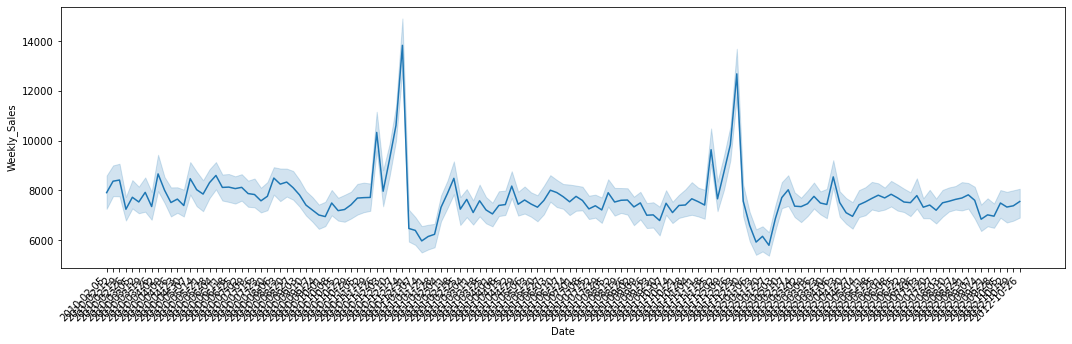

In [30]:
fig, ax = plt.subplots(figsize = (18, 4.8))

ts_weekly_sales = sns.lineplot(data = train,
                               x = 'Date', y = 'Weekly_Sales',
                               estimator = np.median,
                               ax = ax)
plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

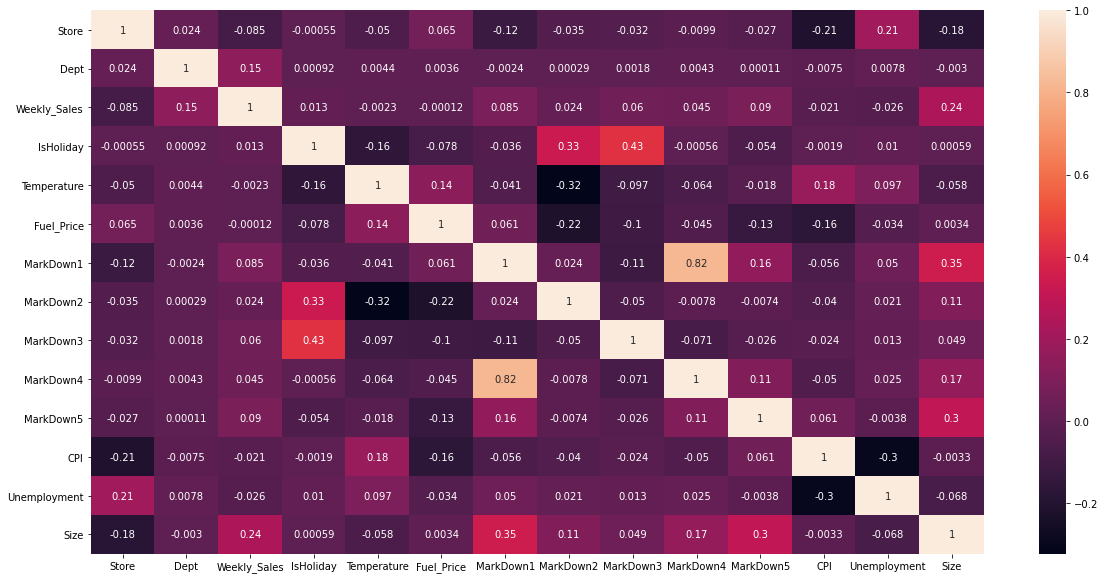

In [31]:
corr = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [14]:
train = train.copy()
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = pd.to_datetime(train['Date']).dt.year
train['Month'] = pd.to_datetime(train['Date']).dt.month
train['Day'] = pd.to_datetime(train['Date']).dt.day
train['Week'] = pd.to_datetime(train['Date']).dt.week
train['Weekofyear'] = pd.to_datetime(train['Date']).dt.weekofyear

In [31]:
train.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
Year                     int64
Month                    int64
Day                      int64
Week                     int64
Weekofyear               int64
dtype: object

*All variables are numeric exept "IsHoliday" that is booelan and Type (of the store) that is object*

In [9]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Day,Week,Weekofyear
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,2010.968591,6.449510,15.673131,25.826762,25.826762
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,0.796876,3.243217,8.753549,14.151887,14.151887
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000,1.000000,1.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,2010.000000,4.000000,8.000000,14.000000,14.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,2011.000000,6.000000,16.000000,26.000000,26.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,2012.000000,9.000000,23.000000,38.000000,38.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,31.000000,52.000000,52.000000


*Appearence of negative values on Weekly_Sales column (abnormal)*

In [15]:
train['Weekly_Sales']=(train.Weekly_Sales).abs()
#Replace Weekly_Sales with its absolute value

In [11]:
train.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    358903
IsHoliday            2
Temperature       3528
Fuel_Price         892
MarkDown1         2277
MarkDown2         1499
MarkDown3         1662
MarkDown4         1944
MarkDown5         2293
CPI               2145
Unemployment       349
Type                 3
Size                40
Year                 3
Month               12
Day                 31
Week                52
Weekofyear          52
dtype: int64

**Average Weekly Sales Per Store Type**

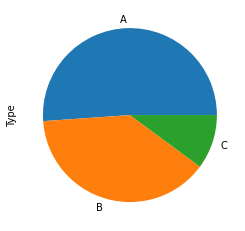

In [37]:
plt.figure()
train['Type'].value_counts().plot.pie()

*Type A Stores are the most dominant*

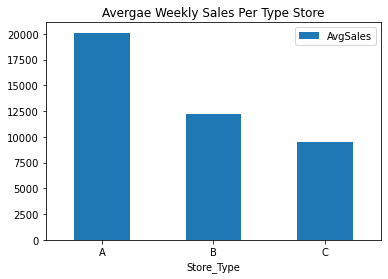

In [38]:
avgweeklysales = train.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])
df.plot.bar(x="Store_Type", y="AvgSales", title="Avergae Weekly Sales Per Type Store",rot=0)

*Avergae Sales per type A stores are higher than ones of the other types*

**Average Weekly Sales Per Store**

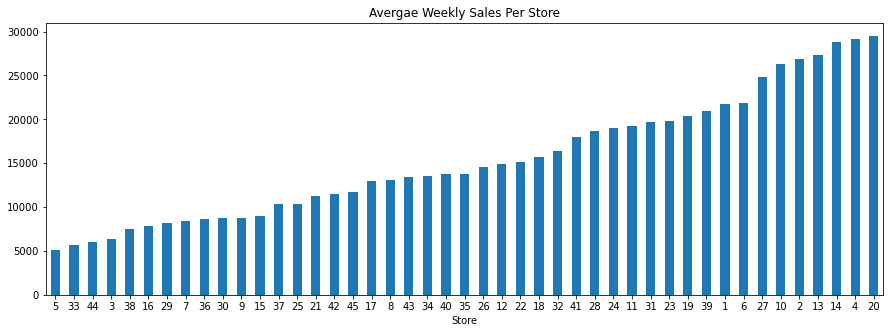

In [39]:
df = train.groupby('Store')['Weekly_Sales'].mean().sort_values()
plt.figure(figsize=(15,5))
df.plot.bar(x=df.index, y=df.values, title="Avergae Weekly Sales Per Store",rot=0)

*the sales vary "hugely" among the 45 stores ---> the Weekly Sales are heighly dependent on variable Store*

**Average Weekly Sales Per Departement**

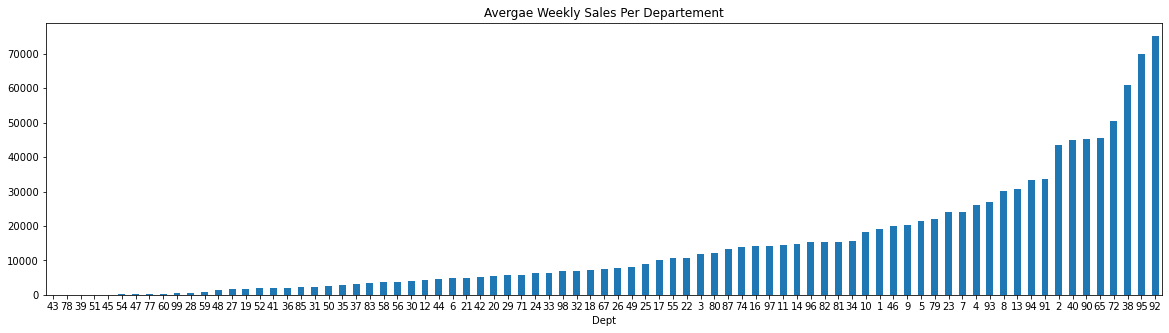

In [40]:
df = train.groupby('Dept')['Weekly_Sales'].mean().sort_values()
plt.figure(figsize=(20,5))
df.plot.bar(x=df.index, y=df.values, title="Avergae Weekly Sales Per Departement",rot=0)

*The sales vary "hugely" among the  diffrent departements ---> the Weekly Sales are heighly dependent on variable Dept*

*The departements 38, 95 and 92 have the heighest levels of Sales while 47, 43, 78, 39, 51, 45 and 45 departements don't have any Sales in all Stores* 

**Average Weekly Sales per Year**

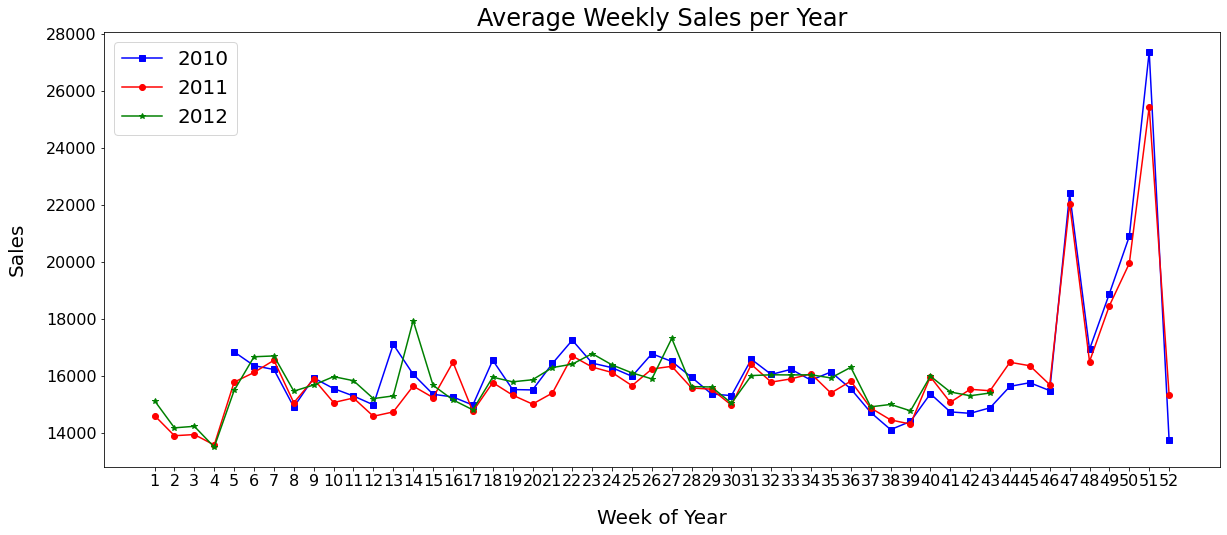

In [41]:
weekly_sales_2010 = train[train.Year==2010].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2011 = train[train.Year==2011].groupby('Week')['Weekly_Sales'].mean()
weekly_sales_2012 = train[train.Year==2012].groupby('Week')['Weekly_Sales'].mean()

plt.figure(figsize=(20,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values, 's-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20)

*Walmart Weekly Sales conserve almost the same trend over the 3 years given.*

*The highest amount of Sales are recorded on the weeks 47 and 51  wich corresponds exactly to one week before the Christmas and the week of Thanksgiving holiday*

**Average Monthly Sales per Year**

<Figure size 4320x5760 with 0 Axes>

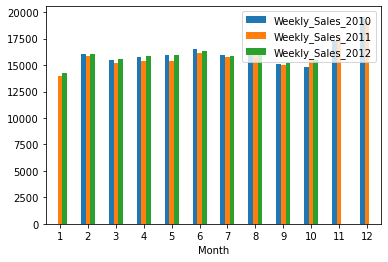

In [42]:
Month_sales_2010 = pd.DataFrame(train[train.Year==2010].groupby('Month')['Weekly_Sales'].mean())
Month_sales_2011 = pd.DataFrame(train[train.Year==2011].groupby('Month')['Weekly_Sales'].mean())
Month_sales_2012 = pd.DataFrame(train[train.Year==2012].groupby('Month')['Weekly_Sales'].mean())
m2010_2011=Month_sales_2010.merge(Month_sales_2011, how='outer',on="Month",sort=True, suffixes=('_2010', '_2011'))
Month_sales=m2010_2011.merge(Month_sales_2012, how='outer',on="Month",sort=True)
Month_sales.rename(columns={"Weekly_Sales": "Weekly_Sales_2012"}, inplace=True)

plt.figure(figsize=(60,80))
Month_sales.plot.bar(rot=0)

*The Average Monthly Sales remains almost in the same level of 15000 for the 3 years given, excepet for the November and December that record a high amount of Sales while Junuary represents the lowest Sales.* 

**Missing values**

In [43]:
(train.isna().sum()/train.shape[0]).sort_values()

Store           0.000000
Day             0.000000
Month           0.000000
Year            0.000000
Size            0.000000
Type            0.000000
Unemployment    0.000000
CPI             0.000000
Week            0.000000
Weekofyear      0.000000
Fuel_Price      0.000000
Temperature     0.000000
IsHoliday       0.000000
Weekly_Sales    0.000000
Date            0.000000
Dept            0.000000
MarkDown5       0.640790
MarkDown1       0.642572
MarkDown3       0.674808
MarkDown4       0.679847
MarkDown2       0.736110
dtype: float64

*MarkDowns present a considerable pourcentage of nan, it's necessery to study their relationship with the target variable in order to decide if it's relevant to conserve them or not.*  

**Correlation**

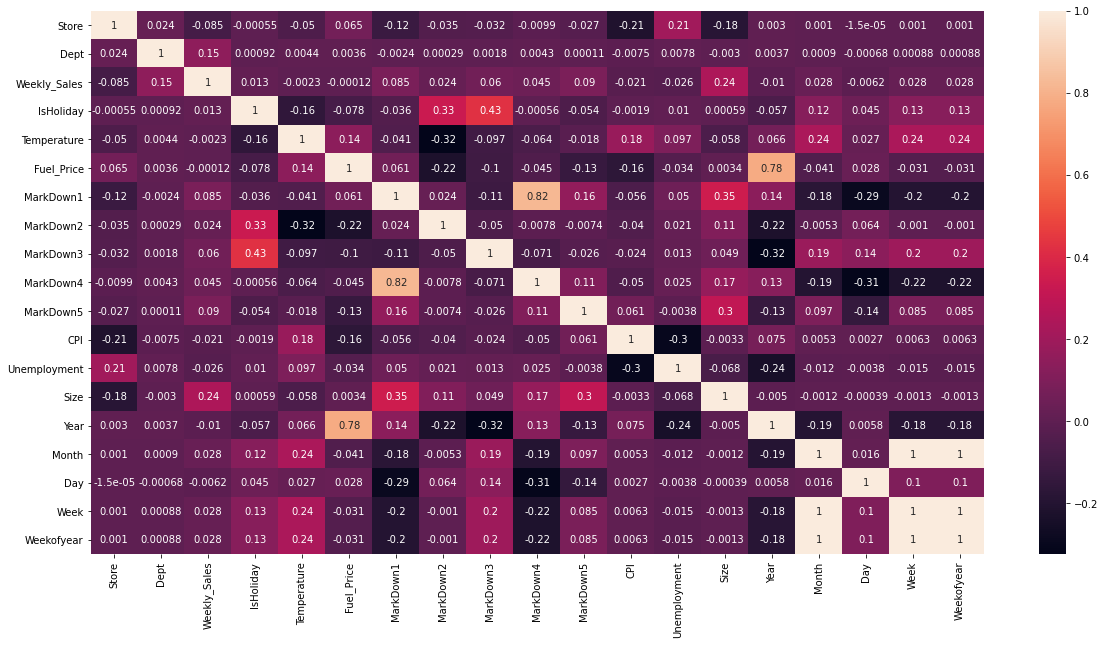

In [44]:
correlation = train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

*Very low correlations between the target 'Weekly Sales' and Temperature, Fuel_Price, CPI, Unemployement --> these columns will be dropped.*

*There is a moderate correlation between the Weekly Sales and each of the features Store, Dept and Size*

**Outliers**

Store              AxesSubplot(0.125,0.749828;0.168478x0.130172)
Dept            AxesSubplot(0.327174,0.749828;0.168478x0.130172)
Weekly_Sales    AxesSubplot(0.529348,0.749828;0.168478x0.130172)
Temperature     AxesSubplot(0.731522,0.749828;0.168478x0.130172)
Fuel_Price         AxesSubplot(0.125,0.593621;0.168478x0.130172)
MarkDown1       AxesSubplot(0.327174,0.593621;0.168478x0.130172)
MarkDown2       AxesSubplot(0.529348,0.593621;0.168478x0.130172)
MarkDown3       AxesSubplot(0.731522,0.593621;0.168478x0.130172)
MarkDown4          AxesSubplot(0.125,0.437414;0.168478x0.130172)
MarkDown5       AxesSubplot(0.327174,0.437414;0.168478x0.130172)
CPI             AxesSubplot(0.529348,0.437414;0.168478x0.130172)
Unemployment    AxesSubplot(0.731522,0.437414;0.168478x0.130172)
Size               AxesSubplot(0.125,0.281207;0.168478x0.130172)
Year            AxesSubplot(0.327174,0.281207;0.168478x0.130172)
Month           AxesSubplot(0.529348,0.281207;0.168478x0.130172)
Day             AxesSubpl

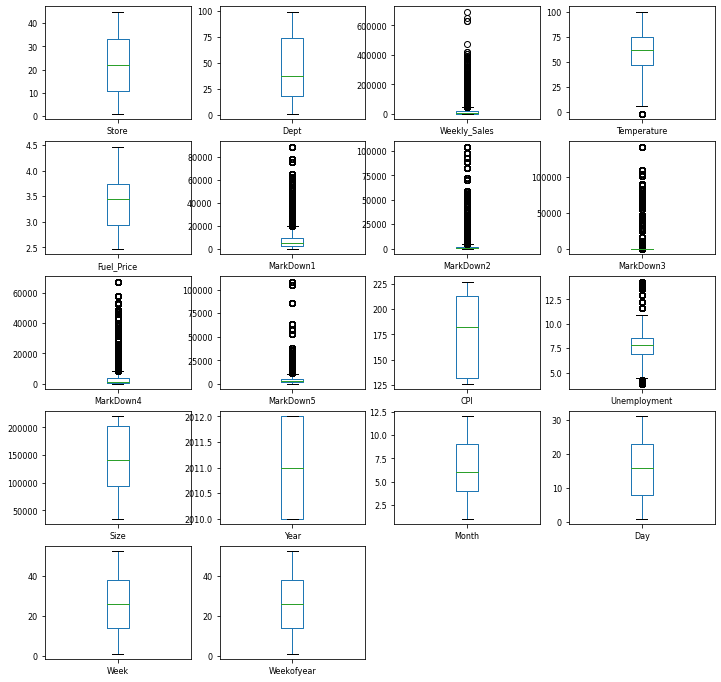

In [45]:
train.plot(kind='box', subplots=True, layout=(5,4), fontsize=8,figsize=(12,12))

### <a class="anchor" id="fe">3. Preprocessing</a>

In [16]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode data
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

train['IsHoliday']=encode(train['IsHoliday']).astype(int)
train['Type']=encode(train['Type']).astype(int)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
correlated_features = set()
correlation_matrix = train.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i,j]) > 0.97:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
correlated_features

{'Week', 'Weekofyear'}

The features 'Month' and 'Weekofyear' have a corelation 1, we chosed to delete 'Month' instead of 'Weekofyear'.

In [18]:
train = train.drop(columns=['Month','Week'])

In [19]:
train = train.drop(['Date', 'Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
             'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment' ], axis=1)

In [20]:
train

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Year,Day,Weekofyear
0,1,1,24924.50,0,0,151315,2010,5,5
1,1,2,50605.27,0,0,151315,2010,5,5
2,1,3,13740.12,0,0,151315,2010,5,5
3,1,4,39954.04,0,0,151315,2010,5,5
4,1,5,32229.38,0,0,151315,2010,5,5
...,...,...,...,...,...,...,...,...,...
421565,45,93,2487.80,0,1,118221,2012,26,43
421566,45,94,5203.31,0,1,118221,2012,26,43
421567,45,95,56017.47,0,1,118221,2012,26,43
421568,45,97,6817.48,0,1,118221,2012,26,43


## <a class="ds" id="rf1">4. Data spliting </a>

In [21]:
train_model = train[train.Year==2010]
test=train[train.Year==2011]

x_train=train_model.drop(columns=['Weekly_Sales'],axis=1)
y_train=train_model['Weekly_Sales']

x_test=test.drop(columns=['Weekly_Sales'],axis=1)
y_test=test['Weekly_Sales']

## <a class="anchor" id="dtr">5. Modeling</a>

# Decision Tree Regressor :

In [35]:
from sklearn.tree import  DecisionTreeRegressor

In [52]:

dtr = DecisionTreeRegressor(random_state=0)

dtr.fit(x_train, y_train)
y_pred =dtr.predict(x_test)
y_pred1 =dtr.predict(x_train)

SSE = sum((y_train - y_pred1)**2)
SST = sum((y_train - np.mean(y_train))**2)
R_squared= 1 - SSE/SST
print("Train score:", R_squared)

SSE = sum((y_test - y_pred)**2)
SST = sum((y_test - np.mean(y_test))**2)
R_squared_test= 1 - SSE/SST
print("Test score:", R_squared_test)

from sklearn.metrics import mean_squared_error as MSE
print("Train RMSE:", MSE(y_train,y_pred1, squared=False))
print("Test RMSE:",  MSE(y_test,y_pred, squared=False))

Train score: 1.0
Test score: 0.9559409005225454
Train RMSE: 3.818668965874127e-17
Test RMSE: 4799.658853346945


In [53]:
comparison_dtr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Delta': y_pred-y_test})
comparison_dtr=pd.concat([comparison_dtr, x_test],axis=1)

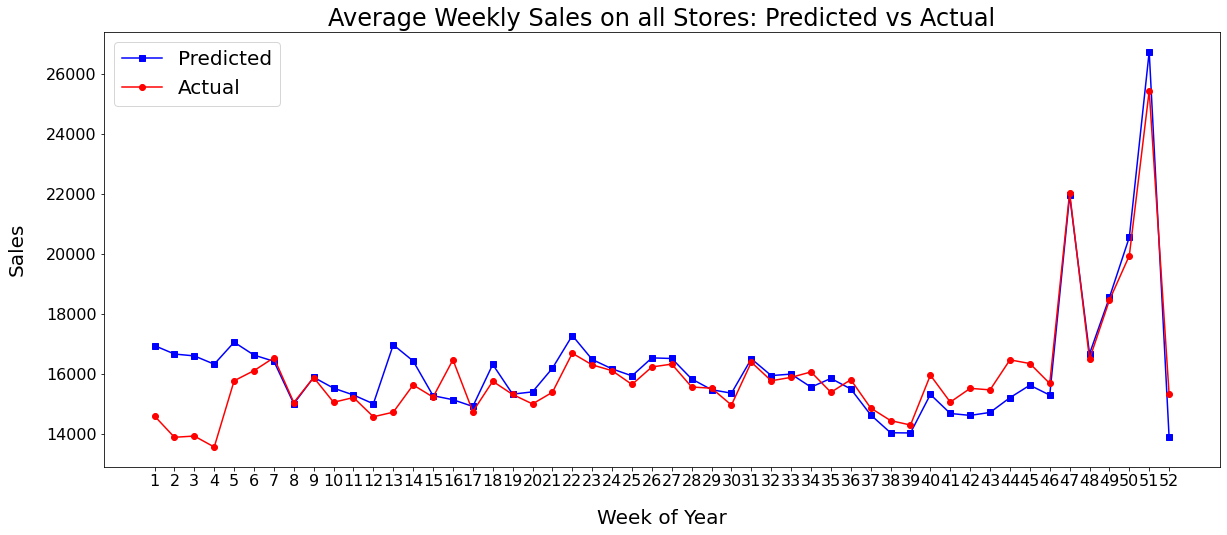

In [54]:
predicted=comparison_dtr.groupby('Weekofyear')['Predicted'].mean()
actual=comparison_dtr.groupby('Weekofyear')['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

Hyperparameter tunning:

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_dt'
dtr=DecisionTreeRegressor()
params_dtr = {'max_depth': [14,20,30,15,None], 'min_samples_leaf':[1,2,4,5,3,6],'random_state': [0,1,2,3]}
# Instantiate a 10-fold CV grid search object 'grid_dt'
grid_dtr = GridSearchCV(estimator=dtr,param_grid=params_dtr ,cv=10,n_jobs=-1)
# Fit 'grid_dtr' to the training data
grid_dtr.fit(x_train, y_train)

In [ ]:
best_hyperparams = grid_dtr.best_params_
print('Best hyerparameters:\n', best_hyperparams)

In [ ]:
from sklearn.metrics import mean_squared_error as RMSE
best_model = grid_dtr.best_estimator_
y_pred = best_model.predict(x_test)
y_pred1 = best_model.predict(x_train)
# Evaluate train set accuracy
train_acc = best_model.score(x_train,y_train)
# Evaluate test set accuracy
test_acc = best_model.score(x_test,y_test)
# Print test set accuracy
print("Train set accuracy of best model: {:.3f}".format(train_acc))
print("Train Error:", RMSE(y_train,y_pred1, squared=False))
print("Test set accuracy of best model: {:.3f}".format(test_acc))
print("Test Error:",  RMSE(y_test,y_pred, squared=False))

## Random forest 

In [22]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor(criterion='mse',min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100,random_state=None)
Model.fit(x_train, y_train )
y_pred = Model.predict(x_test)
y_pred1 =Model.predict(x_train)

In [23]:
SSE = sum((y_train - y_pred1)**2)
SST = sum((y_train - np.mean(y_train))**2)
R_squared= 1 - SSE/SST
print("Train score:", R_squared)

SSE = sum((y_test - y_pred)**2)
SST = sum((y_test - np.mean(y_test))**2)
R_squared_test= 1 - SSE/SST
print("Test score:", R_squared_test)

from sklearn.metrics import mean_squared_error as MSE
print("Train RMSE:", MSE(y_train,y_pred1, squared=False))
print("Test RMSE:",  MSE(y_test,y_pred, squared=False))

Train score: 0.994748237937151
Test score: 0.9610135749343898
Train RMSE: 1671.339789764495
Test RMSE: 4514.911778397526


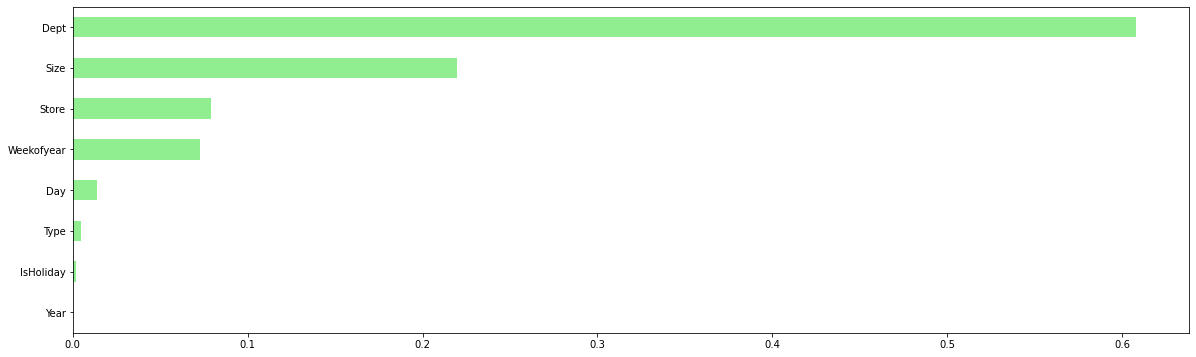

In [24]:
# Create a pd.Series of features importances
importances = pd.Series(Model.feature_importances_, index = x_train.columns)
# Sort importances_rf
sorted_importances = importances.sort_values()
# Make a horizontal bar plot
plt.figure(figsize = (20,6))
sorted_importances.plot(kind='barh', color='lightgreen')
plt.show()  

Hyperparameter tunning:

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

pprint(random_grid)

{'max_depth': [1, 23, 45],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10],
 'n_estimators': [20, 65, 110, 155, 200]}


In [26]:
forest=RandomForestRegressor()

In [27]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = forest, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  6.7min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
cvres2 = rf_random.cv_results_
for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
    print(np.sqrt(-mean_score), params)

21862.45779665526 {'n_estimators': 20, 'min_samples_split': 5, 'max_features': 'auto', 'max_depth': 1}
21860.279690727875 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 1}
12957.009435010643 {'n_estimators': 65, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 23}
11964.077724659533 {'n_estimators': 20, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
22251.54790397119 {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
nan {'n_estimators': 200, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 45}
nan {'n_estimators': 155, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 23}
nan {'n_estimators': 155, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 45}
22247.556464536676 {'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 1}
12803.366790402803 {'n_estimators': 110, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_de

In [29]:
# Performance metrics (MAPE)
random_best= rf_random.best_estimator_.predict(x_test)
errors = abs(random_best - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from the randomized search has an accuracy of', round(accuracy, 2),'%')

The best model from the randomized search has an accuracy of -inf %


In [30]:
#this is the RMSE
final_mse = MSE(y_test, random_best)
final_rmse = np.sqrt(final_mse)
print('The best model from the randomized search has a RMSE of', round(final_rmse, 2))

The best model from the randomized search has a RMSE of 4810.72


In [31]:
comparison_rf2 = pd.DataFrame({'Actual': y_test, 'Predicted': random_best, 'Delta': random_best-y_test})

In [32]:
comparison_rf2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Delta': y_pred-y_test})

In [33]:
comparison_rf2=pd.concat([comparison_rf2, x_test],axis=1)
comparison_rf2.columns

Index(['Actual', 'Predicted', 'Delta', 'Store', 'Dept', 'IsHoliday', 'Type',
       'Size', 'Year', 'Day', 'Weekofyear'],
      dtype='object')

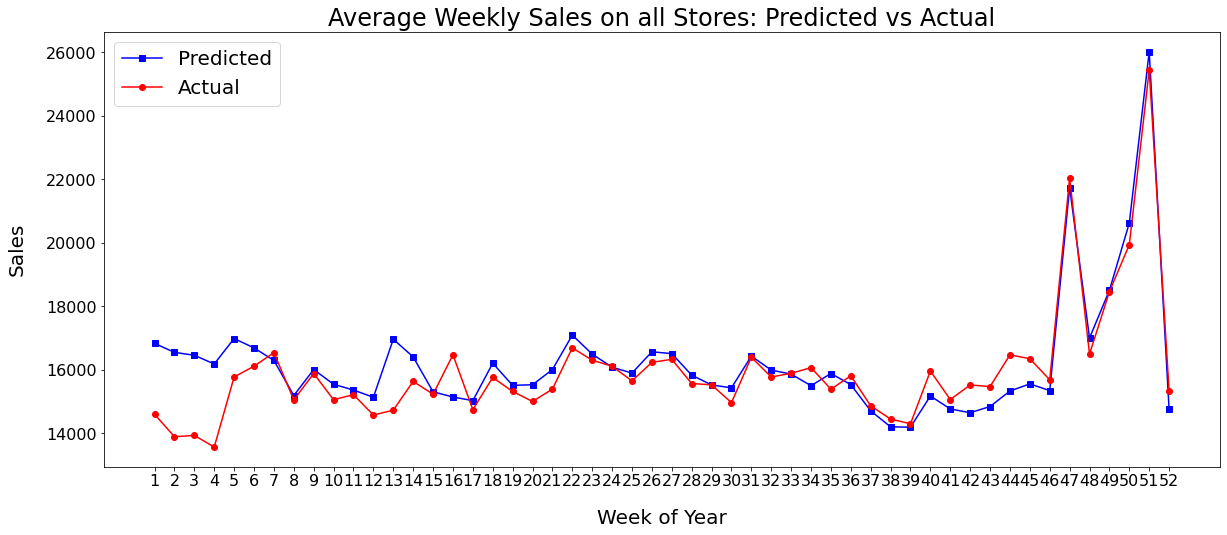

In [34]:
predicted=comparison_rf2.groupby('Weekofyear')['Predicted'].mean()
comparison_rf2['Weekofyear']=comparison_rf2['Weekofyear'].astype(float)
weekofyearA=comparison_rf2['Weekofyear']
l=[]
comparison_rf2.shape

actual=comparison_rf2.groupby(['Weekofyear'])['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

## KNeighborsRegressor

In [71]:
# import the required librairies
from sklearn.neighbors import KNeighborsRegressor
# let build our model
Regressor = KNeighborsRegressor(n_neighbors=1)
Regressor.fit(x_train, y_train)
y_pred = Regressor.predict(x_test)

In [72]:
print("Test Error:", MSE(y_test,y_pred))
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE:",rmse)

Test Error: 26779595.188052516
RMSE: 5174.900500304572


In [73]:
SSE = sum((y_train - y_pred1)**2)
SST = sum((y_train - np.mean(y_train))**2)
R_squared= 1 - SSE/SST
print("Train score:", R_squared)

SSE = sum((y_test - y_pred)**2)
SST = sum((y_test - np.mean(y_test))**2)
R_squared_test= 1 - SSE/SST
print("Test score:", R_squared_test)

from sklearn.metrics import mean_squared_error as MSE
print("Train RMSE:", MSE(y_train,y_pred1, squared=False))
print("Test RMSE:",  MSE(y_test,y_pred, squared=False))

Train score: 0.994622778326173
Test score: 0.9487824400908259
Train RMSE: 1691.1853271336604
Test RMSE: 5174.900500304572


In [74]:
comparison_rf3 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Delta': y_pred-y_test})

In [75]:
comparison_rf3=pd.concat([comparison_rf3, x_test],axis=1)

In [76]:
comparison_rf3

,Actual,Predicted,Delta,Store,Dept,IsHoliday,Type,Size,Year,Day,Weekofyear
3443,15984.24,24924.50,8940.26,1,1,0,0,151315,2011,7,1
3444,43202.29,50605.27,7402.98,1,2,0,0,151315,2011,7,1
3445,15808.15,13740.12,-2068.03,1,3,0,0,151315,2011,7,1
3446,37947.80,39954.04,2006.24,1,4,0,0,151315,2011,7,1
3447,22699.69,32229.38,9529.69,1,5,0,0,151315,2011,7,1
...,...,...,...,...,...,...,...,...,...,...,...
418660,1426.52,2072.46,645.94,45,93,1,1,118221,2011,30,52
418661,2979.03,3966.80,987.77,45,94,1,1,118221,2011,30,52
418662,42084.36,43149.88,1065.52,45,95,1,1,118221,2011,30,52
418663,5569.82,5881.22,311.40,45,97,1,1,118221,2011,30,52


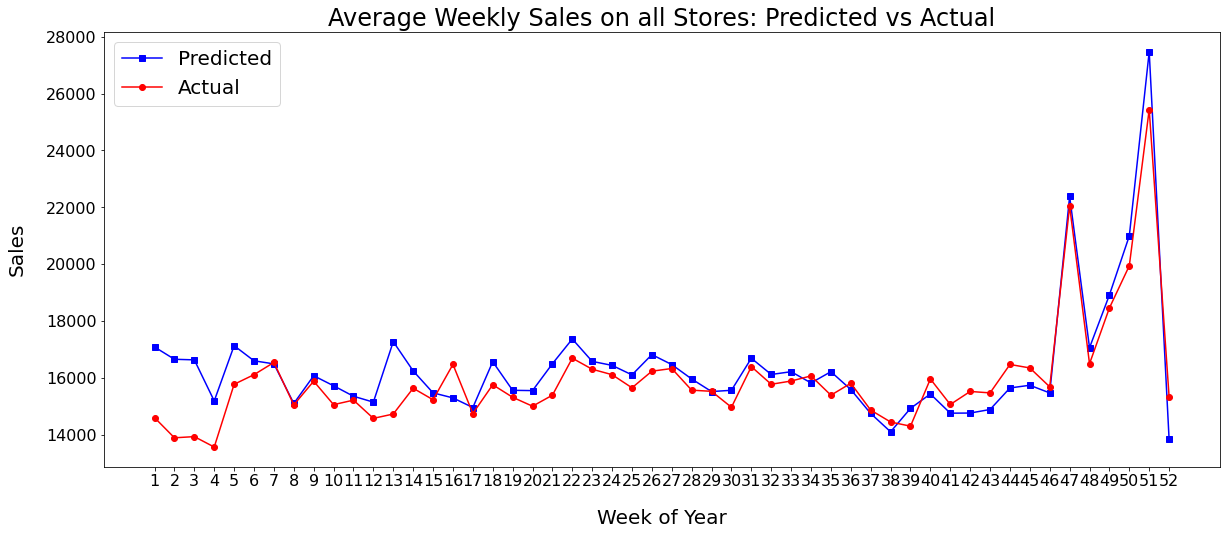

In [77]:
predicted=comparison_rf3.groupby('Weekofyear')['Predicted'].mean()
actual=comparison_rf3.groupby('Weekofyear')['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

# Time series

In [78]:
train[train.Year==2010]['Weekly_Sales']

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
415150     2072.46
415151     3966.80
415152    43149.88
415153     5881.22
415154       74.55
Name: Weekly_Sales, Length: 140679, dtype: float64

In [80]:
weekly_sales =train[train.Year==2010].groupby('Weekofyear')['Weekly_Sales'].mean()
weekly_sales=weekly_sales.values

"'TEST_SET_SIZE=int(len(weekly_sales)*0.2)\ntrain_set_size = len(weekly_sales) - TEST_SET_SIZE\n\ntrain_set, test_set = weekly_sales[:-TEST_SET_SIZE], weekly_sales[-TEST_SET_SIZE:]"

In [81]:
len(weekly_sales)

48

In [82]:
test_set=train[train.Year==2011].groupby('Weekofyear')['Weekly_Sales'].mean().values

In [83]:
# create and evaluate a static autoregressive model
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

model = AutoReg(weekly_sales, lags=[1,4])  
trained_model = model.fit()
# print('Coefficients: %s' % trained_model.params)

In [84]:
from sklearn.metrics import mean_squared_error as mse

predictions = trained_model.predict(start=1, 
                                    end=55)

rmse = np.sqrt(MSE(test_set, predictions))
print("RMSE:",rmse)

RMSE: 2062.344416035034


In [85]:
comparison_ts = pd.DataFrame({'Actual': test_set, 'Predicted': predictions, 'Delta': predictions-test_set})

In [86]:
f=train[train.Year==2011].groupby('Weekofyear').mean()
f=f.reset_index()

In [87]:
comparison_ts=pd.concat([comparison_ts,f],axis=1)

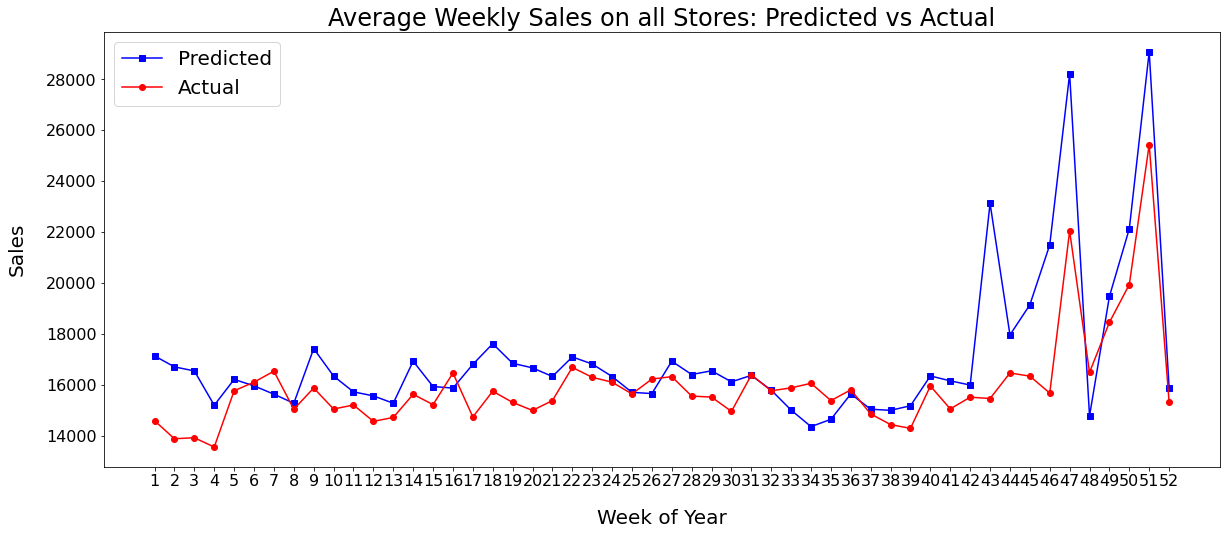

In [88]:
predicted=comparison_ts.groupby('Weekofyear')['Predicted'].mean()
actual=comparison_ts.groupby('Weekofyear')['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

## XGBOOST

In [89]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [90]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
from xgboost.sklearn import XGBRegressor
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor()

In [91]:
import ray
from ray import tune
from ray.tune.suggest import ConcurrencyLimiter
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from ray.tune.suggest.optuna import OptunaSearch
from ray.tune.logger import DEFAULT_LOGGERS
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, \
    GridSearchCV, RandomizedSearchCV, KFold
import optuna

from datetime import datetime

In [92]:
xgb_tune_kwargs = {
    "n_estimators": tune.loguniform(100, 5000),
    "max_depth": tune.randint(3, 10),
    # max_leaves doesn't seem to have any impact on XGBoost but num_leaves does help LGBM, oddly.
    # 'max_leaves': tune.loguniform(1, 1000),    
    "subsample": tune.quniform(0.25, 0.75, 0.01),
    "colsample_bytree": tune.quniform(0.05, 0.5, 0.01),
    "colsample_bylevel": tune.quniform(0.05, 0.5, 0.01),    
    "learning_rate": tune.quniform(-3.0, -1.0, 0.5),
#     "wandb": {
#         "project": "iowa_xgb",
#         "api_key_file": "~/secrets/wandb.txt",
#    }    
}

xgb_tune_params = [k for k in xgb_tune_kwargs.keys() if k != 'wandb']
xgb_tune_params

['n_estimators',
 'max_depth',
 'subsample',
 'colsample_bytree',
 'colsample_bylevel',
 'learning_rate']

In [93]:
# @wandb_mixin
def my_xgb(config):
    
    # fix these configs to match calling convention
    # search wants to pass in floats but xgb wants ints
    #config['max_leaves'] = int(config['max_leaves'])
    config['n_estimators'] = int(config['n_estimators'])   # pass float eg loguniform distribution, use int
    # hyperopt needs left to start at 0 but we want to start at 2    
    config['max_depth'] = int(config['max_depth']) + 2
    config['learning_rate'] = 10 ** config['learning_rate']
    
    xgb = XGBRegressor(
        objective='reg:squarederror',
        n_jobs=1,
        booster='gbtree',   
        scale_pos_weight=1, 
        **config,
    )
    scores = -cross_val_score(xgb,x1, y1,
                                      scoring="neg_root_mean_squared_error",
                                      cv=4)
    rmse = np.mean(scores)
    tune.report(rmse=rmse)
#     wandb.log({"rmse": rmse})

    return {"rmse": rmse}

In [ ]:
NUM_SAMPLES=1000

start_time = datetime.now()
print("%-20s %s" % ("Start Time", start_time))

algo = OptunaSearch()
# uncomment and set max_concurrent to limit number of cores
# algo = ConcurrencyLimiter(algo, max_concurrent=10)
scheduler = AsyncHyperBandScheduler()

# identical tune args
analysis = tune.run(my_xgb,
                    num_samples=NUM_SAMPLES,
                    config=xgb_tune_kwargs,                    
                    name="optuna_xgb",
                    metric="rmse",
                    mode="min",
                    search_alg=algo,
                    scheduler=scheduler,
                    verbose=1,
#                     loggers=DEFAULT_LOGGERS + (WandbLogger, ),
                   ) 
#end_time = datetime.now()
print("%-20s %s" % ("Start Time", start_time))
print("%-20s %s" % ("End Time", end_time))

In [94]:
model = XGBRegressor(n_estimators=2162, max_depth= 10, subsample=0.5, 
                     colsample_bytree= 0.48, colsample_bylevel= 0.48, learning_rate= 0.4)

In [95]:
model.fit(x_train,y_train)
Y_pred=model.predict(x_test)
y_pred1 =model.predict(x_train)

In [97]:
from sklearn.metrics import mean_squared_error as MSE
print("Test Error:", np.sqrt(MSE(y_test,Y_pred)))

Test Error: 5329.381307793627


In [98]:
SSE = sum((y_train - y_pred1)**2)
SST = sum((y_train - np.mean(y_train))**2)
R_squared= 1 - SSE/SST
print("Train score:", R_squared)


from sklearn.metrics import mean_squared_error as MSE
print("Train RMSE:", MSE(y_train,y_pred1, squared=False))
print("Test RMSE:",  MSE(y_test,Y_pred, squared=False))

Train score: 0.9820443397692741
Train RMSE: 3090.387376622406
Test RMSE: 5329.381307793627


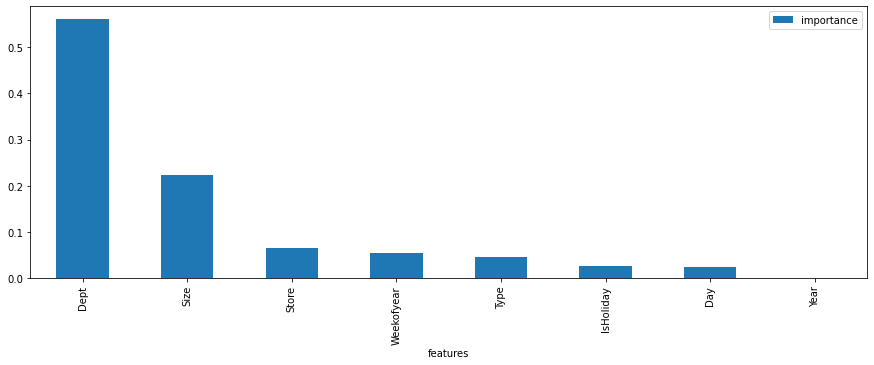

In [99]:
importance = model.feature_importances_
default_imp=pd.DataFrame(data={'importance':importance,'features':x_test.columns})
default_imp=default_imp.set_index('features')
default_imp=default_imp.sort_values('importance',ascending=False)
default_imp.plot(kind='bar',figsize=(15,5))
plt.show()

In [100]:
comparison_xg = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred, 'Delta': Y_pred-y_test})

In [101]:
comparison_xg=pd.concat([comparison_xg, x_test],axis=1)

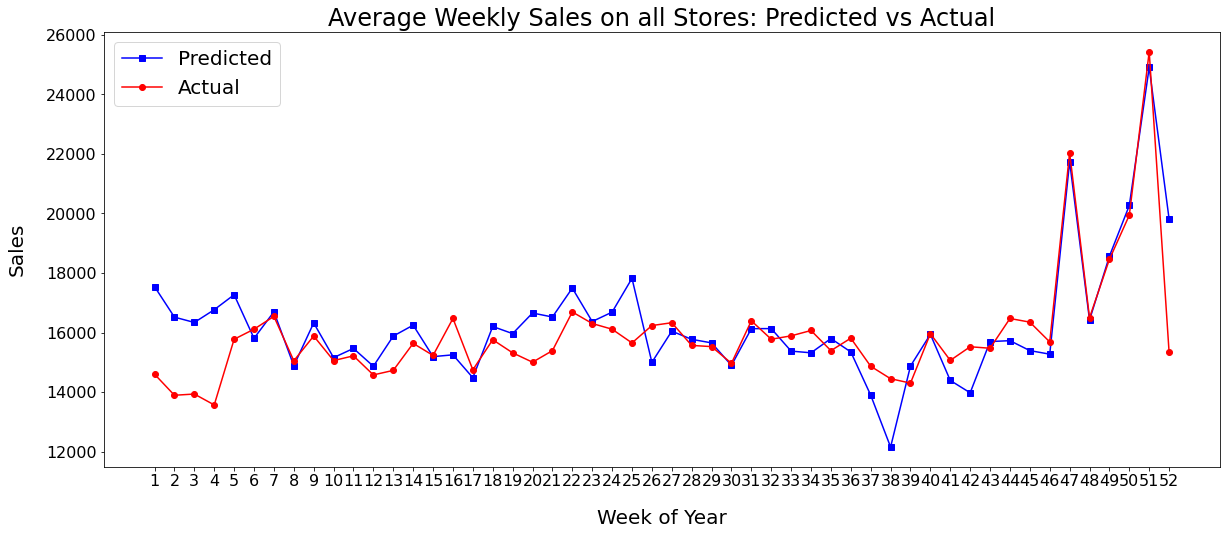

In [102]:
predicted=comparison_xg.groupby('Weekofyear')['Predicted'].mean()
actual=comparison_xg.groupby('Weekofyear')['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

# Catboost

In [19]:
from catboost import Pool, CatBoostRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error

In [20]:
SAMPLE_RATE = 0.4
RANDOM_SEED = 1
EARLY_STOPPING_ROUND = 100

In [21]:
X_train, X_eval, y_train, y_eval = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [22]:
import optuna 
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 9, 16)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [4, 6, 8, 16, 20])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 10000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = RANDOM_SEED
    param['logging_level'] = 'Silent'
    
    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_eval.copy(), y_eval.copy())],
                  early_stopping_rounds=EARLY_STOPPING_ROUND)
    loss = mean_squared_error(y_valid, regressor.predict(X_valid.copy()))
    return loss

In [ ]:
%%time
study = optuna.create_study(study_name=f'catboost-seed{RANDOM_SEED}')
study.optimize(objective, n_trials=10000, n_jobs=-1, timeout=24000)

[I 2022-01-29 22:00:08,160] A new study created in memory with name: catboost-seed1
C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\study.py:393: FutureWarning: `n_jobs` argument has been deprecated in v2.7.0. This feature will be removed in v4.0.0. See https://github.com/optuna/optuna/releases/tag/v2.7.0.
  warnings.warn(
Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.[W 2022-01-29 22:00:08,379] Trial 2 failed because of the following error: CatBoostError("C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/libs/train_lib/dir_helper.cpp:20: Can't create train working dir: catboost_info")
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\optuna\study\_optimize.py", line 213, in _

In [23]:
model = CatBoostRegressor(n_estimators=5000,learning_rate=0.018000000000000002, 
                          depth= 10, l2_leaf_reg= 4.0, min_child_samples=16)

In [24]:
from catboost import CatBoostRegressor
#model = CatBoostRegressor(n_estimators=5000,learning_rate= 0.02, depth= 9, l2_leaf_reg= 5.5, min_child_samples= 16)
#model = CatBoostRegressor(n_estimators=10000,learning_rate= 0.014000000000000002, depth=10, l2_leaf_reg=4.5, min_child_samples= 16)
model.fit( X_train, y_train)
y_pred=model.predict(x_test)
y_pred1 =model.predict(X_train)
print("Test Error:", MSE(y_test,y_pred))

0:	learn: 22769.4380883	total: 233ms	remaining: 19m 22s
1:	learn: 22586.7096021	total: 308ms	remaining: 12m 50s
2:	learn: 22410.9912915	total: 360ms	remaining: 9m 59s
3:	learn: 22238.5015852	total: 401ms	remaining: 8m 21s
4:	learn: 22071.4383498	total: 447ms	remaining: 7m 26s
5:	learn: 21909.8501425	total: 499ms	remaining: 6m 55s
6:	learn: 21752.3602185	total: 552ms	remaining: 6m 33s
7:	learn: 21561.7041985	total: 595ms	remaining: 6m 11s
8:	learn: 21397.6600932	total: 637ms	remaining: 5m 53s
9:	learn: 21235.6183284	total: 691ms	remaining: 5m 44s
10:	learn: 21092.8414391	total: 733ms	remaining: 5m 32s
11:	learn: 20941.8708313	total: 773ms	remaining: 5m 21s
12:	learn: 20789.2269324	total: 823ms	remaining: 5m 15s
13:	learn: 20651.9940686	total: 900ms	remaining: 5m 20s
14:	learn: 20508.8160200	total: 956ms	remaining: 5m 17s
15:	learn: 20367.7710635	total: 994ms	remaining: 5m 9s
16:	learn: 20229.8936303	total: 1.04s	remaining: 5m 4s
17:	learn: 20107.9739176	total: 1.08s	remaining: 4m 59s
18

148:	learn: 12686.3005979	total: 10.9s	remaining: 5m 56s
149:	learn: 12658.7525932	total: 11s	remaining: 5m 55s
150:	learn: 12628.7357763	total: 11.1s	remaining: 5m 55s
151:	learn: 12593.5554529	total: 11.1s	remaining: 5m 54s
152:	learn: 12564.0571109	total: 11.2s	remaining: 5m 53s
153:	learn: 12545.8233210	total: 11.3s	remaining: 5m 56s
154:	learn: 12523.9531740	total: 11.5s	remaining: 6m
155:	learn: 12509.1979976	total: 11.7s	remaining: 6m 2s
156:	learn: 12489.4767963	total: 11.8s	remaining: 6m 3s
157:	learn: 12468.0756276	total: 11.9s	remaining: 6m 3s
158:	learn: 12450.2878863	total: 11.9s	remaining: 6m 3s
159:	learn: 12419.8804659	total: 12s	remaining: 6m 2s
160:	learn: 12404.8560333	total: 12.1s	remaining: 6m 2s
161:	learn: 12387.5060450	total: 12.1s	remaining: 6m 1s
162:	learn: 12366.8973273	total: 12.2s	remaining: 6m
163:	learn: 12352.9216186	total: 12.2s	remaining: 6m 1s
164:	learn: 12331.9980482	total: 12.3s	remaining: 6m
165:	learn: 12304.1215085	total: 12.3s	remaining: 5m 59

295:	learn: 10355.9368625	total: 20.3s	remaining: 5m 23s
296:	learn: 10346.4592872	total: 20.4s	remaining: 5m 22s
297:	learn: 10338.9252489	total: 20.4s	remaining: 5m 22s
298:	learn: 10325.3550503	total: 20.5s	remaining: 5m 22s
299:	learn: 10314.2928953	total: 20.6s	remaining: 5m 22s
300:	learn: 10305.7613351	total: 20.7s	remaining: 5m 22s
301:	learn: 10290.7501661	total: 20.7s	remaining: 5m 21s
302:	learn: 10281.2644952	total: 20.7s	remaining: 5m 21s
303:	learn: 10271.2312216	total: 20.8s	remaining: 5m 21s
304:	learn: 10255.2590863	total: 20.8s	remaining: 5m 20s
305:	learn: 10247.9016787	total: 20.9s	remaining: 5m 20s
306:	learn: 10232.7879167	total: 21s	remaining: 5m 21s
307:	learn: 10222.0348970	total: 21.1s	remaining: 5m 21s
308:	learn: 10215.6111130	total: 21.3s	remaining: 5m 22s
309:	learn: 10200.7174558	total: 21.4s	remaining: 5m 23s
310:	learn: 10193.5837880	total: 21.4s	remaining: 5m 23s
311:	learn: 10186.1170006	total: 21.5s	remaining: 5m 22s
312:	learn: 10170.0555394	total: 

445:	learn: 9092.8908346	total: 29.2s	remaining: 4m 57s
446:	learn: 9088.3539912	total: 29.2s	remaining: 4m 57s
447:	learn: 9081.9356431	total: 29.3s	remaining: 4m 57s
448:	learn: 9069.9132826	total: 29.3s	remaining: 4m 57s
449:	learn: 9065.6838332	total: 29.4s	remaining: 4m 57s
450:	learn: 9061.7149736	total: 29.5s	remaining: 4m 57s
451:	learn: 9052.9472854	total: 29.5s	remaining: 4m 57s
452:	learn: 9046.6400189	total: 29.6s	remaining: 4m 56s
453:	learn: 9042.3644915	total: 29.6s	remaining: 4m 56s
454:	learn: 9037.5469429	total: 29.7s	remaining: 4m 56s
455:	learn: 9032.4461867	total: 29.7s	remaining: 4m 56s
456:	learn: 9027.8776663	total: 29.8s	remaining: 4m 55s
457:	learn: 9021.8932057	total: 29.8s	remaining: 4m 55s
458:	learn: 9013.9650243	total: 29.8s	remaining: 4m 55s
459:	learn: 9005.7980283	total: 29.9s	remaining: 4m 55s
460:	learn: 8998.9171381	total: 29.9s	remaining: 4m 54s
461:	learn: 8989.7877377	total: 30s	remaining: 4m 54s
462:	learn: 8983.4697503	total: 30s	remaining: 4m 

593:	learn: 8288.4002706	total: 36.9s	remaining: 4m 34s
594:	learn: 8285.3182949	total: 37s	remaining: 4m 33s
595:	learn: 8279.8879508	total: 37.1s	remaining: 4m 33s
596:	learn: 8275.6572636	total: 37.1s	remaining: 4m 33s
597:	learn: 8271.2456898	total: 37.2s	remaining: 4m 33s
598:	learn: 8268.7111473	total: 37.2s	remaining: 4m 33s
599:	learn: 8265.5284201	total: 37.3s	remaining: 4m 33s
600:	learn: 8256.5868240	total: 37.4s	remaining: 4m 33s
601:	learn: 8252.2464877	total: 37.4s	remaining: 4m 33s
602:	learn: 8249.0783496	total: 37.5s	remaining: 4m 33s
603:	learn: 8245.9614744	total: 37.5s	remaining: 4m 33s
604:	learn: 8241.6684753	total: 37.6s	remaining: 4m 33s
605:	learn: 8237.8413528	total: 37.6s	remaining: 4m 32s
606:	learn: 8230.6400842	total: 37.7s	remaining: 4m 32s
607:	learn: 8227.0565657	total: 37.7s	remaining: 4m 32s
608:	learn: 8221.2726034	total: 37.8s	remaining: 4m 32s
609:	learn: 8216.5833795	total: 37.8s	remaining: 4m 32s
610:	learn: 8208.9183712	total: 37.9s	remaining: 4

742:	learn: 7675.2400189	total: 45.3s	remaining: 4m 19s
743:	learn: 7670.3392470	total: 45.4s	remaining: 4m 19s
744:	learn: 7667.5387381	total: 45.4s	remaining: 4m 19s
745:	learn: 7663.6223814	total: 45.5s	remaining: 4m 19s
746:	learn: 7657.3223379	total: 45.5s	remaining: 4m 19s
747:	learn: 7654.5655064	total: 45.6s	remaining: 4m 19s
748:	learn: 7650.1774840	total: 45.6s	remaining: 4m 18s
749:	learn: 7647.4592872	total: 45.7s	remaining: 4m 18s
750:	learn: 7642.6957961	total: 45.7s	remaining: 4m 18s
751:	learn: 7638.8873269	total: 45.8s	remaining: 4m 18s
752:	learn: 7635.0536434	total: 45.8s	remaining: 4m 18s
753:	learn: 7631.7668596	total: 45.9s	remaining: 4m 18s
754:	learn: 7629.7343174	total: 45.9s	remaining: 4m 18s
755:	learn: 7627.2672214	total: 46s	remaining: 4m 17s
756:	learn: 7623.8706572	total: 46s	remaining: 4m 17s
757:	learn: 7621.5114122	total: 46s	remaining: 4m 17s
758:	learn: 7617.2893057	total: 46.1s	remaining: 4m 17s
759:	learn: 7611.4585873	total: 46.2s	remaining: 4m 17

891:	learn: 7165.5526820	total: 53.7s	remaining: 4m 7s
892:	learn: 7163.9847114	total: 53.8s	remaining: 4m 7s
893:	learn: 7159.1168249	total: 53.8s	remaining: 4m 7s
894:	learn: 7156.4923493	total: 53.9s	remaining: 4m 7s
895:	learn: 7153.6714850	total: 54s	remaining: 4m 7s
896:	learn: 7151.1655609	total: 54s	remaining: 4m 7s
897:	learn: 7148.0436820	total: 54.1s	remaining: 4m 7s
898:	learn: 7145.8073573	total: 54.1s	remaining: 4m 6s
899:	learn: 7142.7329220	total: 54.2s	remaining: 4m 6s
900:	learn: 7140.5671591	total: 54.2s	remaining: 4m 6s
901:	learn: 7137.8823216	total: 54.3s	remaining: 4m 6s
902:	learn: 7135.5135614	total: 54.3s	remaining: 4m 6s
903:	learn: 7133.6434869	total: 54.4s	remaining: 4m 6s
904:	learn: 7131.0730837	total: 54.4s	remaining: 4m 6s
905:	learn: 7126.2946389	total: 54.5s	remaining: 4m 6s
906:	learn: 7124.5799312	total: 54.5s	remaining: 4m 6s
907:	learn: 7122.1694114	total: 54.6s	remaining: 4m 5s
908:	learn: 7117.6013451	total: 54.6s	remaining: 4m 5s
909:	learn: 71

1042:	learn: 6774.1183709	total: 1m 2s	remaining: 3m 55s
1043:	learn: 6771.7803364	total: 1m 2s	remaining: 3m 55s
1044:	learn: 6766.4821030	total: 1m 2s	remaining: 3m 55s
1045:	learn: 6764.3779069	total: 1m 2s	remaining: 3m 55s
1046:	learn: 6762.6984600	total: 1m 2s	remaining: 3m 54s
1047:	learn: 6760.1162448	total: 1m 2s	remaining: 3m 54s
1048:	learn: 6755.8254024	total: 1m 2s	remaining: 3m 54s
1049:	learn: 6753.7297083	total: 1m 2s	remaining: 3m 54s
1050:	learn: 6752.4687949	total: 1m 2s	remaining: 3m 54s
1051:	learn: 6749.3741983	total: 1m 2s	remaining: 3m 54s
1052:	learn: 6747.6686978	total: 1m 2s	remaining: 3m 54s
1053:	learn: 6743.3466761	total: 1m 2s	remaining: 3m 54s
1054:	learn: 6739.1901990	total: 1m 2s	remaining: 3m 54s
1055:	learn: 6737.2903858	total: 1m 2s	remaining: 3m 54s
1056:	learn: 6734.8796559	total: 1m 2s	remaining: 3m 53s
1057:	learn: 6731.7456856	total: 1m 2s	remaining: 3m 54s
1058:	learn: 6729.1434256	total: 1m 2s	remaining: 3m 54s
1059:	learn: 6727.8899227	total

1186:	learn: 6452.1563107	total: 1m 9s	remaining: 3m 44s
1187:	learn: 6450.0536394	total: 1m 9s	remaining: 3m 44s
1188:	learn: 6447.7341432	total: 1m 10s	remaining: 3m 44s
1189:	learn: 6445.8534121	total: 1m 10s	remaining: 3m 44s
1190:	learn: 6444.5834467	total: 1m 10s	remaining: 3m 44s
1191:	learn: 6442.7003665	total: 1m 10s	remaining: 3m 44s
1192:	learn: 6441.4240902	total: 1m 10s	remaining: 3m 44s
1193:	learn: 6438.1676916	total: 1m 10s	remaining: 3m 44s
1194:	learn: 6436.3220063	total: 1m 10s	remaining: 3m 43s
1195:	learn: 6434.7441273	total: 1m 10s	remaining: 3m 43s
1196:	learn: 6433.3206405	total: 1m 10s	remaining: 3m 43s
1197:	learn: 6431.7737781	total: 1m 10s	remaining: 3m 43s
1198:	learn: 6429.8592200	total: 1m 10s	remaining: 3m 43s
1199:	learn: 6428.7466521	total: 1m 10s	remaining: 3m 43s
1200:	learn: 6425.9322954	total: 1m 10s	remaining: 3m 43s
1201:	learn: 6424.7417731	total: 1m 10s	remaining: 3m 43s
1202:	learn: 6422.7316683	total: 1m 10s	remaining: 3m 43s
1203:	learn: 642

1331:	learn: 6189.8715429	total: 1m 17s	remaining: 3m 33s
1332:	learn: 6188.6887769	total: 1m 17s	remaining: 3m 33s
1333:	learn: 6186.5865053	total: 1m 17s	remaining: 3m 33s
1334:	learn: 6185.6025654	total: 1m 17s	remaining: 3m 33s
1335:	learn: 6184.4160095	total: 1m 17s	remaining: 3m 33s
1336:	learn: 6182.5123308	total: 1m 17s	remaining: 3m 33s
1337:	learn: 6180.4952579	total: 1m 17s	remaining: 3m 33s
1338:	learn: 6179.1192529	total: 1m 17s	remaining: 3m 33s
1339:	learn: 6177.7995494	total: 1m 17s	remaining: 3m 32s
1340:	learn: 6176.7021301	total: 1m 18s	remaining: 3m 32s
1341:	learn: 6174.8283468	total: 1m 18s	remaining: 3m 32s
1342:	learn: 6173.0675592	total: 1m 18s	remaining: 3m 32s
1343:	learn: 6171.5661605	total: 1m 18s	remaining: 3m 32s
1344:	learn: 6170.4413204	total: 1m 18s	remaining: 3m 32s
1345:	learn: 6169.0063776	total: 1m 18s	remaining: 3m 32s
1346:	learn: 6167.0603989	total: 1m 18s	remaining: 3m 32s
1347:	learn: 6165.3019127	total: 1m 18s	remaining: 3m 32s
1348:	learn: 6

1474:	learn: 5973.2846417	total: 1m 25s	remaining: 3m 23s
1475:	learn: 5971.7026762	total: 1m 25s	remaining: 3m 23s
1476:	learn: 5970.6570589	total: 1m 25s	remaining: 3m 23s
1477:	learn: 5969.7334158	total: 1m 25s	remaining: 3m 23s
1478:	learn: 5968.3626247	total: 1m 25s	remaining: 3m 22s
1479:	learn: 5966.9281386	total: 1m 25s	remaining: 3m 22s
1480:	learn: 5966.0770844	total: 1m 25s	remaining: 3m 22s
1481:	learn: 5965.2740762	total: 1m 25s	remaining: 3m 22s
1482:	learn: 5963.6973584	total: 1m 25s	remaining: 3m 22s
1483:	learn: 5962.4944310	total: 1m 25s	remaining: 3m 22s
1484:	learn: 5961.7560680	total: 1m 25s	remaining: 3m 22s
1485:	learn: 5960.6538254	total: 1m 25s	remaining: 3m 22s
1486:	learn: 5959.4620822	total: 1m 25s	remaining: 3m 22s
1487:	learn: 5957.1362187	total: 1m 25s	remaining: 3m 22s
1488:	learn: 5953.8921118	total: 1m 25s	remaining: 3m 22s
1489:	learn: 5952.6496504	total: 1m 25s	remaining: 3m 22s
1490:	learn: 5951.6597304	total: 1m 25s	remaining: 3m 21s
1491:	learn: 5

1617:	learn: 5767.4300759	total: 1m 32s	remaining: 3m 13s
1618:	learn: 5766.2038524	total: 1m 32s	remaining: 3m 13s
1619:	learn: 5764.8976724	total: 1m 32s	remaining: 3m 13s
1620:	learn: 5764.1815176	total: 1m 32s	remaining: 3m 12s
1621:	learn: 5763.2364320	total: 1m 32s	remaining: 3m 12s
1622:	learn: 5760.8031462	total: 1m 32s	remaining: 3m 12s
1623:	learn: 5759.6848705	total: 1m 32s	remaining: 3m 12s
1624:	learn: 5757.7981948	total: 1m 32s	remaining: 3m 12s
1625:	learn: 5756.2325634	total: 1m 32s	remaining: 3m 12s
1626:	learn: 5754.9890538	total: 1m 32s	remaining: 3m 12s
1627:	learn: 5753.5961885	total: 1m 32s	remaining: 3m 12s
1628:	learn: 5752.8816107	total: 1m 33s	remaining: 3m 12s
1629:	learn: 5751.8436655	total: 1m 33s	remaining: 3m 12s
1630:	learn: 5750.6599841	total: 1m 33s	remaining: 3m 12s
1631:	learn: 5749.5013029	total: 1m 33s	remaining: 3m 12s
1632:	learn: 5746.5739372	total: 1m 33s	remaining: 3m 12s
1633:	learn: 5744.9038975	total: 1m 33s	remaining: 3m 12s
1634:	learn: 5

1764:	learn: 5586.5790941	total: 1m 39s	remaining: 3m 2s
1765:	learn: 5585.2630156	total: 1m 39s	remaining: 3m 2s
1766:	learn: 5584.1739378	total: 1m 39s	remaining: 3m 2s
1767:	learn: 5583.0704774	total: 1m 39s	remaining: 3m 2s
1768:	learn: 5582.3275308	total: 1m 40s	remaining: 3m 2s
1769:	learn: 5581.1950392	total: 1m 40s	remaining: 3m 2s
1770:	learn: 5578.7348563	total: 1m 40s	remaining: 3m 2s
1771:	learn: 5577.9296448	total: 1m 40s	remaining: 3m 2s
1772:	learn: 5577.1292896	total: 1m 40s	remaining: 3m 2s
1773:	learn: 5575.5207398	total: 1m 40s	remaining: 3m 2s
1774:	learn: 5574.3534336	total: 1m 40s	remaining: 3m 2s
1775:	learn: 5572.8482750	total: 1m 40s	remaining: 3m 2s
1776:	learn: 5571.7837896	total: 1m 40s	remaining: 3m 2s
1777:	learn: 5570.7733707	total: 1m 40s	remaining: 3m 2s
1778:	learn: 5569.4720057	total: 1m 40s	remaining: 3m 2s
1779:	learn: 5568.3382417	total: 1m 40s	remaining: 3m 2s
1780:	learn: 5566.9820287	total: 1m 40s	remaining: 3m 1s
1781:	learn: 5566.3146752	total

1909:	learn: 5416.0046981	total: 1m 47s	remaining: 2m 53s
1910:	learn: 5414.9462254	total: 1m 47s	remaining: 2m 53s
1911:	learn: 5414.3316168	total: 1m 47s	remaining: 2m 53s
1912:	learn: 5413.3500202	total: 1m 47s	remaining: 2m 53s
1913:	learn: 5412.1950791	total: 1m 47s	remaining: 2m 53s
1914:	learn: 5411.0649682	total: 1m 47s	remaining: 2m 53s
1915:	learn: 5410.2935927	total: 1m 47s	remaining: 2m 53s
1916:	learn: 5409.4711650	total: 1m 47s	remaining: 2m 53s
1917:	learn: 5408.6496522	total: 1m 47s	remaining: 2m 53s
1918:	learn: 5407.6326764	total: 1m 47s	remaining: 2m 53s
1919:	learn: 5406.6691376	total: 1m 47s	remaining: 2m 53s
1920:	learn: 5405.8385868	total: 1m 47s	remaining: 2m 53s
1921:	learn: 5404.6445573	total: 1m 47s	remaining: 2m 52s
1922:	learn: 5403.1344684	total: 1m 48s	remaining: 2m 52s
1923:	learn: 5402.5338465	total: 1m 48s	remaining: 2m 52s
1924:	learn: 5401.4305764	total: 1m 48s	remaining: 2m 52s
1925:	learn: 5400.1966745	total: 1m 48s	remaining: 2m 52s
1926:	learn: 5

2052:	learn: 5262.8860334	total: 1m 54s	remaining: 2m 44s
2053:	learn: 5261.6346374	total: 1m 54s	remaining: 2m 44s
2054:	learn: 5260.8293812	total: 1m 54s	remaining: 2m 44s
2055:	learn: 5258.7433864	total: 1m 54s	remaining: 2m 44s
2056:	learn: 5256.8406030	total: 1m 55s	remaining: 2m 44s
2057:	learn: 5256.2084985	total: 1m 55s	remaining: 2m 44s
2058:	learn: 5254.7008360	total: 1m 55s	remaining: 2m 44s
2059:	learn: 5253.9535332	total: 1m 55s	remaining: 2m 44s
2060:	learn: 5252.2380287	total: 1m 55s	remaining: 2m 44s
2061:	learn: 5251.4068094	total: 1m 55s	remaining: 2m 44s
2062:	learn: 5250.1830130	total: 1m 55s	remaining: 2m 44s
2063:	learn: 5249.1397706	total: 1m 55s	remaining: 2m 44s
2064:	learn: 5248.1837481	total: 1m 55s	remaining: 2m 44s
2065:	learn: 5247.5416569	total: 1m 55s	remaining: 2m 44s
2066:	learn: 5246.7038849	total: 1m 55s	remaining: 2m 43s
2067:	learn: 5245.9492121	total: 1m 55s	remaining: 2m 43s
2068:	learn: 5244.1512345	total: 1m 55s	remaining: 2m 43s
2069:	learn: 5

2196:	learn: 5118.8492425	total: 2m 2s	remaining: 2m 35s
2197:	learn: 5118.3431347	total: 2m 2s	remaining: 2m 35s
2198:	learn: 5117.5633416	total: 2m 2s	remaining: 2m 35s
2199:	learn: 5116.3511609	total: 2m 2s	remaining: 2m 35s
2200:	learn: 5115.0647465	total: 2m 2s	remaining: 2m 35s
2201:	learn: 5114.2425483	total: 2m 2s	remaining: 2m 35s
2202:	learn: 5113.7428188	total: 2m 2s	remaining: 2m 35s
2203:	learn: 5113.1453450	total: 2m 2s	remaining: 2m 35s
2204:	learn: 5112.4134142	total: 2m 2s	remaining: 2m 35s
2205:	learn: 5111.6975336	total: 2m 2s	remaining: 2m 35s
2206:	learn: 5111.1907571	total: 2m 2s	remaining: 2m 35s
2207:	learn: 5110.4926029	total: 2m 2s	remaining: 2m 35s
2208:	learn: 5109.7161966	total: 2m 2s	remaining: 2m 35s
2209:	learn: 5108.7079435	total: 2m 2s	remaining: 2m 35s
2210:	learn: 5108.2122933	total: 2m 2s	remaining: 2m 35s
2211:	learn: 5106.8825048	total: 2m 2s	remaining: 2m 34s
2212:	learn: 5105.6736788	total: 2m 2s	remaining: 2m 34s
2213:	learn: 5105.0645693	total

2342:	learn: 4992.7518568	total: 2m 9s	remaining: 2m 27s
2343:	learn: 4991.9728311	total: 2m 9s	remaining: 2m 27s
2344:	learn: 4991.1594723	total: 2m 9s	remaining: 2m 27s
2345:	learn: 4990.8137468	total: 2m 9s	remaining: 2m 27s
2346:	learn: 4990.1162230	total: 2m 10s	remaining: 2m 26s
2347:	learn: 4989.5486268	total: 2m 10s	remaining: 2m 26s
2348:	learn: 4989.1150073	total: 2m 10s	remaining: 2m 26s
2349:	learn: 4988.4412924	total: 2m 10s	remaining: 2m 26s
2350:	learn: 4987.5717610	total: 2m 10s	remaining: 2m 26s
2351:	learn: 4986.8248686	total: 2m 10s	remaining: 2m 26s
2352:	learn: 4986.3494492	total: 2m 10s	remaining: 2m 26s
2353:	learn: 4985.3650048	total: 2m 10s	remaining: 2m 26s
2354:	learn: 4984.5333306	total: 2m 10s	remaining: 2m 26s
2355:	learn: 4983.9859585	total: 2m 10s	remaining: 2m 26s
2356:	learn: 4983.2994607	total: 2m 10s	remaining: 2m 26s
2357:	learn: 4982.6683934	total: 2m 10s	remaining: 2m 26s
2358:	learn: 4981.8721014	total: 2m 10s	remaining: 2m 26s
2359:	learn: 4981.

2487:	learn: 4886.7655426	total: 2m 17s	remaining: 2m 19s
2488:	learn: 4886.3296999	total: 2m 17s	remaining: 2m 19s
2489:	learn: 4885.4183429	total: 2m 17s	remaining: 2m 18s
2490:	learn: 4884.4903336	total: 2m 17s	remaining: 2m 18s
2491:	learn: 4883.5500024	total: 2m 17s	remaining: 2m 18s
2492:	learn: 4882.9633751	total: 2m 18s	remaining: 2m 18s
2493:	learn: 4882.1538077	total: 2m 18s	remaining: 2m 18s
2494:	learn: 4880.4146664	total: 2m 18s	remaining: 2m 18s
2495:	learn: 4879.8959440	total: 2m 18s	remaining: 2m 18s
2496:	learn: 4878.8653274	total: 2m 18s	remaining: 2m 18s
2497:	learn: 4877.8619647	total: 2m 18s	remaining: 2m 18s
2498:	learn: 4877.2151049	total: 2m 18s	remaining: 2m 18s
2499:	learn: 4876.5954442	total: 2m 18s	remaining: 2m 18s
2500:	learn: 4875.6501843	total: 2m 18s	remaining: 2m 18s
2501:	learn: 4875.1348577	total: 2m 18s	remaining: 2m 18s
2502:	learn: 4874.6486470	total: 2m 18s	remaining: 2m 18s
2503:	learn: 4873.9835968	total: 2m 18s	remaining: 2m 18s
2504:	learn: 4

2629:	learn: 4784.6346609	total: 2m 25s	remaining: 2m 11s
2630:	learn: 4783.9810695	total: 2m 25s	remaining: 2m 11s
2631:	learn: 4783.1909345	total: 2m 25s	remaining: 2m 11s
2632:	learn: 4782.5204771	total: 2m 25s	remaining: 2m 10s
2633:	learn: 4781.1634594	total: 2m 25s	remaining: 2m 10s
2634:	learn: 4780.7816169	total: 2m 25s	remaining: 2m 10s
2635:	learn: 4780.3390195	total: 2m 25s	remaining: 2m 10s
2636:	learn: 4779.7026747	total: 2m 25s	remaining: 2m 10s
2637:	learn: 4779.2056669	total: 2m 25s	remaining: 2m 10s
2638:	learn: 4778.4964007	total: 2m 26s	remaining: 2m 10s
2639:	learn: 4778.1255434	total: 2m 26s	remaining: 2m 10s
2640:	learn: 4777.6093561	total: 2m 26s	remaining: 2m 10s
2641:	learn: 4777.1413709	total: 2m 26s	remaining: 2m 10s
2642:	learn: 4776.1670061	total: 2m 26s	remaining: 2m 10s
2643:	learn: 4775.5510373	total: 2m 26s	remaining: 2m 10s
2644:	learn: 4774.6584304	total: 2m 26s	remaining: 2m 10s
2645:	learn: 4773.9690608	total: 2m 26s	remaining: 2m 10s
2646:	learn: 4

2775:	learn: 4687.9799584	total: 2m 33s	remaining: 2m 2s
2776:	learn: 4687.3279183	total: 2m 33s	remaining: 2m 2s
2777:	learn: 4686.7074097	total: 2m 33s	remaining: 2m 2s
2778:	learn: 4686.1128690	total: 2m 33s	remaining: 2m 2s
2779:	learn: 4685.3608033	total: 2m 33s	remaining: 2m 2s
2780:	learn: 4684.8608592	total: 2m 33s	remaining: 2m 2s
2781:	learn: 4684.4857219	total: 2m 33s	remaining: 2m 2s
2782:	learn: 4683.8836015	total: 2m 33s	remaining: 2m 2s
2783:	learn: 4683.4052045	total: 2m 33s	remaining: 2m 2s
2784:	learn: 4682.0727620	total: 2m 33s	remaining: 2m 2s
2785:	learn: 4681.4447791	total: 2m 33s	remaining: 2m 2s
2786:	learn: 4680.9829414	total: 2m 33s	remaining: 2m 1s
2787:	learn: 4680.5047319	total: 2m 33s	remaining: 2m 1s
2788:	learn: 4679.8588787	total: 2m 33s	remaining: 2m 1s
2789:	learn: 4679.5504025	total: 2m 33s	remaining: 2m 1s
2790:	learn: 4678.9285212	total: 2m 33s	remaining: 2m 1s
2791:	learn: 4678.4917610	total: 2m 33s	remaining: 2m 1s
2792:	learn: 4677.4341859	total

2918:	learn: 4594.3690065	total: 2m 40s	remaining: 1m 54s
2919:	learn: 4593.4317352	total: 2m 40s	remaining: 1m 54s
2920:	learn: 4592.7078725	total: 2m 40s	remaining: 1m 54s
2921:	learn: 4591.8089112	total: 2m 40s	remaining: 1m 54s
2922:	learn: 4590.9848177	total: 2m 40s	remaining: 1m 54s
2923:	learn: 4590.4968074	total: 2m 40s	remaining: 1m 54s
2924:	learn: 4590.0176081	total: 2m 40s	remaining: 1m 53s
2925:	learn: 4589.6569729	total: 2m 40s	remaining: 1m 53s
2926:	learn: 4588.9683655	total: 2m 40s	remaining: 1m 53s
2927:	learn: 4588.3440083	total: 2m 40s	remaining: 1m 53s
2928:	learn: 4587.4174967	total: 2m 40s	remaining: 1m 53s
2929:	learn: 4586.7382691	total: 2m 40s	remaining: 1m 53s
2930:	learn: 4586.2190844	total: 2m 40s	remaining: 1m 53s
2931:	learn: 4585.7414677	total: 2m 40s	remaining: 1m 53s
2932:	learn: 4585.3769583	total: 2m 40s	remaining: 1m 53s
2933:	learn: 4584.4696885	total: 2m 41s	remaining: 1m 53s
2934:	learn: 4584.1835766	total: 2m 41s	remaining: 1m 53s
2935:	learn: 4

3062:	learn: 4510.0087903	total: 2m 47s	remaining: 1m 45s
3063:	learn: 4509.0969414	total: 2m 47s	remaining: 1m 45s
3064:	learn: 4508.7827980	total: 2m 47s	remaining: 1m 45s
3065:	learn: 4508.4497654	total: 2m 47s	remaining: 1m 45s
3066:	learn: 4507.6915384	total: 2m 47s	remaining: 1m 45s
3067:	learn: 4506.7204637	total: 2m 47s	remaining: 1m 45s
3068:	learn: 4505.6768046	total: 2m 47s	remaining: 1m 45s
3069:	learn: 4504.9792626	total: 2m 47s	remaining: 1m 45s
3070:	learn: 4504.5758476	total: 2m 48s	remaining: 1m 45s
3071:	learn: 4504.1743222	total: 2m 48s	remaining: 1m 45s
3072:	learn: 4503.8306673	total: 2m 48s	remaining: 1m 45s
3073:	learn: 4503.3063046	total: 2m 48s	remaining: 1m 45s
3074:	learn: 4502.8156069	total: 2m 48s	remaining: 1m 45s
3075:	learn: 4502.4250991	total: 2m 48s	remaining: 1m 45s
3076:	learn: 4501.9334082	total: 2m 48s	remaining: 1m 45s
3077:	learn: 4501.6043881	total: 2m 48s	remaining: 1m 45s
3078:	learn: 4501.0606061	total: 2m 48s	remaining: 1m 45s
3079:	learn: 4

3204:	learn: 4433.8635104	total: 2m 54s	remaining: 1m 38s
3205:	learn: 4433.5366497	total: 2m 55s	remaining: 1m 37s
3206:	learn: 4433.0150050	total: 2m 55s	remaining: 1m 37s
3207:	learn: 4432.5267298	total: 2m 55s	remaining: 1m 37s
3208:	learn: 4432.0547197	total: 2m 55s	remaining: 1m 37s
3209:	learn: 4431.4396023	total: 2m 55s	remaining: 1m 37s
3210:	learn: 4431.1019505	total: 2m 55s	remaining: 1m 37s
3211:	learn: 4430.5539674	total: 2m 55s	remaining: 1m 37s
3212:	learn: 4430.0820606	total: 2m 55s	remaining: 1m 37s
3213:	learn: 4429.7254175	total: 2m 55s	remaining: 1m 37s
3214:	learn: 4428.9607096	total: 2m 55s	remaining: 1m 37s
3215:	learn: 4428.5156962	total: 2m 55s	remaining: 1m 37s
3216:	learn: 4428.1122907	total: 2m 55s	remaining: 1m 37s
3217:	learn: 4427.7003496	total: 2m 55s	remaining: 1m 37s
3218:	learn: 4427.0466743	total: 2m 55s	remaining: 1m 37s
3219:	learn: 4426.3589517	total: 2m 55s	remaining: 1m 37s
3220:	learn: 4425.8750178	total: 2m 55s	remaining: 1m 37s
3221:	learn: 4

3348:	learn: 4360.9794127	total: 3m 2s	remaining: 1m 29s
3349:	learn: 4360.5923228	total: 3m 2s	remaining: 1m 29s
3350:	learn: 4360.0193917	total: 3m 2s	remaining: 1m 29s
3351:	learn: 4359.6045627	total: 3m 2s	remaining: 1m 29s
3352:	learn: 4359.2280069	total: 3m 2s	remaining: 1m 29s
3353:	learn: 4358.8353668	total: 3m 2s	remaining: 1m 29s
3354:	learn: 4358.2446175	total: 3m 2s	remaining: 1m 29s
3355:	learn: 4357.8696540	total: 3m 2s	remaining: 1m 29s
3356:	learn: 4357.0515298	total: 3m 2s	remaining: 1m 29s
3357:	learn: 4356.7493003	total: 3m 2s	remaining: 1m 29s
3358:	learn: 4356.5550624	total: 3m 2s	remaining: 1m 29s
3359:	learn: 4355.7850513	total: 3m 2s	remaining: 1m 29s
3360:	learn: 4355.1435072	total: 3m 2s	remaining: 1m 29s
3361:	learn: 4354.5496931	total: 3m 3s	remaining: 1m 29s
3362:	learn: 4353.8531087	total: 3m 3s	remaining: 1m 29s
3363:	learn: 4353.4867043	total: 3m 3s	remaining: 1m 29s
3364:	learn: 4353.1822576	total: 3m 3s	remaining: 1m 28s
3365:	learn: 4352.6543903	total

3493:	learn: 4289.8521086	total: 3m 9s	remaining: 1m 21s
3494:	learn: 4289.4153423	total: 3m 9s	remaining: 1m 21s
3495:	learn: 4288.6602845	total: 3m 9s	remaining: 1m 21s
3496:	learn: 4288.3653649	total: 3m 10s	remaining: 1m 21s
3497:	learn: 4288.1343640	total: 3m 10s	remaining: 1m 21s
3498:	learn: 4287.5531042	total: 3m 10s	remaining: 1m 21s
3499:	learn: 4286.9497539	total: 3m 10s	remaining: 1m 21s
3500:	learn: 4286.0156785	total: 3m 10s	remaining: 1m 21s
3501:	learn: 4285.6366473	total: 3m 10s	remaining: 1m 21s
3502:	learn: 4285.1910911	total: 3m 10s	remaining: 1m 21s
3503:	learn: 4284.6821065	total: 3m 10s	remaining: 1m 21s
3504:	learn: 4284.2323524	total: 3m 10s	remaining: 1m 21s
3505:	learn: 4284.0104536	total: 3m 10s	remaining: 1m 21s
3506:	learn: 4283.7759305	total: 3m 10s	remaining: 1m 21s
3507:	learn: 4283.4610082	total: 3m 10s	remaining: 1m 21s
3508:	learn: 4283.3389523	total: 3m 10s	remaining: 1m 21s
3509:	learn: 4282.9539814	total: 3m 10s	remaining: 1m 20s
3510:	learn: 4281

3639:	learn: 4221.3643306	total: 3m 17s	remaining: 1m 13s
3640:	learn: 4220.9937201	total: 3m 17s	remaining: 1m 13s
3641:	learn: 4220.6221473	total: 3m 17s	remaining: 1m 13s
3642:	learn: 4219.6270938	total: 3m 17s	remaining: 1m 13s
3643:	learn: 4219.2151863	total: 3m 17s	remaining: 1m 13s
3644:	learn: 4218.8755992	total: 3m 17s	remaining: 1m 13s
3645:	learn: 4218.4450823	total: 3m 17s	remaining: 1m 13s
3646:	learn: 4218.1559350	total: 3m 17s	remaining: 1m 13s
3647:	learn: 4217.7034415	total: 3m 17s	remaining: 1m 13s
3648:	learn: 4217.3038088	total: 3m 17s	remaining: 1m 13s
3649:	learn: 4216.9659109	total: 3m 17s	remaining: 1m 13s
3650:	learn: 4216.4941737	total: 3m 17s	remaining: 1m 13s
3651:	learn: 4216.1986357	total: 3m 18s	remaining: 1m 13s
3652:	learn: 4215.7395776	total: 3m 18s	remaining: 1m 13s
3653:	learn: 4215.3133531	total: 3m 18s	remaining: 1m 12s
3654:	learn: 4214.9495859	total: 3m 18s	remaining: 1m 12s
3655:	learn: 4214.4181359	total: 3m 18s	remaining: 1m 12s
3656:	learn: 4

3782:	learn: 4159.1810458	total: 3m 24s	remaining: 1m 5s
3783:	learn: 4158.8647499	total: 3m 24s	remaining: 1m 5s
3784:	learn: 4157.4166900	total: 3m 24s	remaining: 1m 5s
3785:	learn: 4157.0276993	total: 3m 24s	remaining: 1m 5s
3786:	learn: 4156.3545112	total: 3m 24s	remaining: 1m 5s
3787:	learn: 4155.8659959	total: 3m 24s	remaining: 1m 5s
3788:	learn: 4155.2821155	total: 3m 24s	remaining: 1m 5s
3789:	learn: 4154.7488034	total: 3m 25s	remaining: 1m 5s
3790:	learn: 4154.1971283	total: 3m 25s	remaining: 1m 5s
3791:	learn: 4153.8864078	total: 3m 25s	remaining: 1m 5s
3792:	learn: 4153.4628850	total: 3m 25s	remaining: 1m 5s
3793:	learn: 4152.9047089	total: 3m 25s	remaining: 1m 5s
3794:	learn: 4152.3769285	total: 3m 25s	remaining: 1m 5s
3795:	learn: 4152.0883566	total: 3m 25s	remaining: 1m 5s
3796:	learn: 4151.1401932	total: 3m 25s	remaining: 1m 5s
3797:	learn: 4150.7390426	total: 3m 25s	remaining: 1m 5s
3798:	learn: 4150.4464558	total: 3m 25s	remaining: 1m 4s
3799:	learn: 4150.1563714	total

3927:	learn: 4101.1629425	total: 3m 33s	remaining: 58.1s
3928:	learn: 4100.8463039	total: 3m 33s	remaining: 58.1s
3929:	learn: 4100.6070113	total: 3m 33s	remaining: 58s
3930:	learn: 4100.1135475	total: 3m 33s	remaining: 58s
3931:	learn: 4099.3249363	total: 3m 33s	remaining: 57.9s
3932:	learn: 4098.9667840	total: 3m 33s	remaining: 57.9s
3933:	learn: 4098.7709417	total: 3m 33s	remaining: 57.8s
3934:	learn: 4098.0980862	total: 3m 33s	remaining: 57.8s
3935:	learn: 4097.5435192	total: 3m 33s	remaining: 57.7s
3936:	learn: 4097.3336647	total: 3m 33s	remaining: 57.7s
3937:	learn: 4096.2485405	total: 3m 33s	remaining: 57.6s
3938:	learn: 4095.8500663	total: 3m 33s	remaining: 57.6s
3939:	learn: 4095.5926278	total: 3m 33s	remaining: 57.5s
3940:	learn: 4095.2356585	total: 3m 33s	remaining: 57.4s
3941:	learn: 4094.1869359	total: 3m 33s	remaining: 57.4s
3942:	learn: 4093.7358261	total: 3m 33s	remaining: 57.3s
3943:	learn: 4093.0867428	total: 3m 33s	remaining: 57.3s
3944:	learn: 4092.6361079	total: 3m

4072:	learn: 4038.1262459	total: 3m 41s	remaining: 50.3s
4073:	learn: 4037.6784688	total: 3m 41s	remaining: 50.3s
4074:	learn: 4037.2139076	total: 3m 41s	remaining: 50.2s
4075:	learn: 4036.9709468	total: 3m 41s	remaining: 50.2s
4076:	learn: 4036.6084170	total: 3m 41s	remaining: 50.1s
4077:	learn: 4035.9503863	total: 3m 41s	remaining: 50.1s
4078:	learn: 4035.7708200	total: 3m 41s	remaining: 50s
4079:	learn: 4035.4684797	total: 3m 41s	remaining: 50s
4080:	learn: 4035.1146964	total: 3m 41s	remaining: 49.9s
4081:	learn: 4034.6550954	total: 3m 41s	remaining: 49.9s
4082:	learn: 4033.7188768	total: 3m 41s	remaining: 49.8s
4083:	learn: 4033.2268217	total: 3m 41s	remaining: 49.7s
4084:	learn: 4032.9412377	total: 3m 41s	remaining: 49.7s
4085:	learn: 4032.5388433	total: 3m 41s	remaining: 49.6s
4086:	learn: 4031.9766772	total: 3m 41s	remaining: 49.6s
4087:	learn: 4031.6945971	total: 3m 41s	remaining: 49.5s
4088:	learn: 4031.2208601	total: 3m 42s	remaining: 49.5s
4089:	learn: 4029.9331177	total: 3m

4218:	learn: 3974.7639499	total: 3m 49s	remaining: 42.5s
4219:	learn: 3974.4764964	total: 3m 49s	remaining: 42.4s
4220:	learn: 3974.2731306	total: 3m 49s	remaining: 42.3s
4221:	learn: 3974.0035771	total: 3m 49s	remaining: 42.3s
4222:	learn: 3973.5005911	total: 3m 49s	remaining: 42.2s
4223:	learn: 3973.1876803	total: 3m 49s	remaining: 42.2s
4224:	learn: 3972.8301774	total: 3m 49s	remaining: 42.1s
4225:	learn: 3972.1144630	total: 3m 49s	remaining: 42.1s
4226:	learn: 3971.8612465	total: 3m 49s	remaining: 42s
4227:	learn: 3971.1249414	total: 3m 49s	remaining: 41.9s
4228:	learn: 3970.7479488	total: 3m 49s	remaining: 41.9s
4229:	learn: 3970.4649222	total: 3m 49s	remaining: 41.8s
4230:	learn: 3970.2690799	total: 3m 49s	remaining: 41.8s
4231:	learn: 3969.8720756	total: 3m 49s	remaining: 41.7s
4232:	learn: 3969.4477860	total: 3m 49s	remaining: 41.7s
4233:	learn: 3969.0023868	total: 3m 50s	remaining: 41.6s
4234:	learn: 3968.7103175	total: 3m 50s	remaining: 41.6s
4235:	learn: 3968.4416147	total: 

4367:	learn: 3915.4628447	total: 3m 57s	remaining: 34.4s
4368:	learn: 3915.0705551	total: 3m 57s	remaining: 34.3s
4369:	learn: 3914.6613396	total: 3m 57s	remaining: 34.3s
4370:	learn: 3914.2485799	total: 3m 57s	remaining: 34.2s
4371:	learn: 3913.8011579	total: 3m 57s	remaining: 34.2s
4372:	learn: 3913.6013694	total: 3m 57s	remaining: 34.1s
4373:	learn: 3912.6779428	total: 3m 57s	remaining: 34.1s
4374:	learn: 3912.1550492	total: 3m 58s	remaining: 34s
4375:	learn: 3911.8145171	total: 3m 58s	remaining: 34s
4376:	learn: 3911.3896331	total: 3m 58s	remaining: 33.9s
4377:	learn: 3911.0604324	total: 3m 58s	remaining: 33.9s
4378:	learn: 3910.5438816	total: 3m 58s	remaining: 33.8s
4379:	learn: 3909.9667230	total: 3m 58s	remaining: 33.7s
4380:	learn: 3909.6084345	total: 3m 58s	remaining: 33.7s
4381:	learn: 3909.1744696	total: 3m 58s	remaining: 33.6s
4382:	learn: 3908.7516106	total: 3m 58s	remaining: 33.6s
4383:	learn: 3908.2196424	total: 3m 58s	remaining: 33.5s
4384:	learn: 3907.7051713	total: 3m

4514:	learn: 3859.0512253	total: 4m 5s	remaining: 26.4s
4515:	learn: 3858.8018459	total: 4m 6s	remaining: 26.4s
4516:	learn: 3858.3868316	total: 4m 6s	remaining: 26.3s
4517:	learn: 3858.1646735	total: 4m 6s	remaining: 26.3s
4518:	learn: 3857.7349182	total: 4m 6s	remaining: 26.2s
4519:	learn: 3857.5937031	total: 4m 6s	remaining: 26.1s
4520:	learn: 3857.3349095	total: 4m 6s	remaining: 26.1s
4521:	learn: 3857.0548259	total: 4m 6s	remaining: 26s
4522:	learn: 3856.6054558	total: 4m 6s	remaining: 26s
4523:	learn: 3856.4112465	total: 4m 6s	remaining: 25.9s
4524:	learn: 3856.1886091	total: 4m 6s	remaining: 25.9s
4525:	learn: 3856.0069162	total: 4m 6s	remaining: 25.8s
4526:	learn: 3855.6265343	total: 4m 6s	remaining: 25.8s
4527:	learn: 3855.2605566	total: 4m 6s	remaining: 25.7s
4528:	learn: 3855.0712306	total: 4m 6s	remaining: 25.6s
4529:	learn: 3854.6823365	total: 4m 6s	remaining: 25.6s
4530:	learn: 3854.3760174	total: 4m 6s	remaining: 25.5s
4531:	learn: 3854.0892587	total: 4m 6s	remaining: 25

4662:	learn: 3801.4772017	total: 4m 13s	remaining: 18.3s
4663:	learn: 3801.0673076	total: 4m 13s	remaining: 18.3s
4664:	learn: 3800.5881726	total: 4m 13s	remaining: 18.2s
4665:	learn: 3800.3269109	total: 4m 13s	remaining: 18.1s
4666:	learn: 3800.1514765	total: 4m 13s	remaining: 18.1s
4667:	learn: 3799.5262312	total: 4m 13s	remaining: 18s
4668:	learn: 3799.0816680	total: 4m 13s	remaining: 18s
4669:	learn: 3798.8096872	total: 4m 13s	remaining: 17.9s
4670:	learn: 3798.5835390	total: 4m 13s	remaining: 17.9s
4671:	learn: 3798.2628593	total: 4m 13s	remaining: 17.8s
4672:	learn: 3797.2905515	total: 4m 13s	remaining: 17.8s
4673:	learn: 3796.9767008	total: 4m 13s	remaining: 17.7s
4674:	learn: 3796.7450783	total: 4m 13s	remaining: 17.7s
4675:	learn: 3796.4287131	total: 4m 14s	remaining: 17.6s
4676:	learn: 3796.2694930	total: 4m 14s	remaining: 17.5s
4677:	learn: 3795.8316434	total: 4m 14s	remaining: 17.5s
4678:	learn: 3795.5251730	total: 4m 14s	remaining: 17.4s
4679:	learn: 3794.8310804	total: 4m

4807:	learn: 3751.9462745	total: 4m 20s	remaining: 10.4s
4808:	learn: 3751.7022869	total: 4m 20s	remaining: 10.4s
4809:	learn: 3751.4684573	total: 4m 20s	remaining: 10.3s
4810:	learn: 3751.0710226	total: 4m 20s	remaining: 10.3s
4811:	learn: 3750.8188807	total: 4m 21s	remaining: 10.2s
4812:	learn: 3750.4338570	total: 4m 21s	remaining: 10.1s
4813:	learn: 3750.1514724	total: 4m 21s	remaining: 10.1s
4814:	learn: 3749.9821136	total: 4m 21s	remaining: 10s
4815:	learn: 3749.6802078	total: 4m 21s	remaining: 9.98s
4816:	learn: 3749.4342561	total: 4m 21s	remaining: 9.93s
4817:	learn: 3749.1314136	total: 4m 21s	remaining: 9.87s
4818:	learn: 3748.7509855	total: 4m 21s	remaining: 9.82s
4819:	learn: 3748.6092185	total: 4m 21s	remaining: 9.76s
4820:	learn: 3748.4615376	total: 4m 21s	remaining: 9.71s
4821:	learn: 3748.1470231	total: 4m 21s	remaining: 9.65s
4822:	learn: 3747.7981667	total: 4m 21s	remaining: 9.6s
4823:	learn: 3747.5285357	total: 4m 21s	remaining: 9.54s
4824:	learn: 3747.3465216	total: 4

4954:	learn: 3705.0841460	total: 4m 28s	remaining: 2.44s
4955:	learn: 3704.6090325	total: 4m 28s	remaining: 2.38s
4956:	learn: 3704.3953340	total: 4m 28s	remaining: 2.33s
4957:	learn: 3704.0720879	total: 4m 28s	remaining: 2.27s
4958:	learn: 3703.7947486	total: 4m 28s	remaining: 2.22s
4959:	learn: 3703.4852466	total: 4m 28s	remaining: 2.17s
4960:	learn: 3703.3135771	total: 4m 28s	remaining: 2.11s
4961:	learn: 3703.1080195	total: 4m 28s	remaining: 2.06s
4962:	learn: 3702.9719384	total: 4m 28s	remaining: 2s
4963:	learn: 3702.6683959	total: 4m 28s	remaining: 1.95s
4964:	learn: 3702.4054874	total: 4m 28s	remaining: 1.9s
4965:	learn: 3702.2003570	total: 4m 28s	remaining: 1.84s
4966:	learn: 3701.8447725	total: 4m 28s	remaining: 1.79s
4967:	learn: 3701.5776694	total: 4m 29s	remaining: 1.73s
4968:	learn: 3701.4033723	total: 4m 29s	remaining: 1.68s
4969:	learn: 3701.0958143	total: 4m 29s	remaining: 1.63s
4970:	learn: 3700.8536188	total: 4m 29s	remaining: 1.57s
4971:	learn: 3700.6128205	total: 4m

In [25]:
print("Test Error:", np.sqrt(MSE(y_test,y_pred)))

Test Error: 4918.383246751857


In [26]:
SSE = sum((y_train - y_pred1)**2)
SST = sum((y_train - np.mean(y_train))**2)
R_squared= 1 - SSE/SST
print("Train score:", R_squared)

SSE = sum((y_test - y_pred)**2)
SST = sum((y_test - np.mean(y_test))**2)
R_squared_test= 1 - SSE/SST
print("Test score:", R_squared_test)

from sklearn.metrics import mean_squared_error as MSE
print("Train RMSE:", MSE(y_train,y_pred1, squared=False))
print("Test RMSE:",  MSE(y_test,y_pred, squared=False))

Train score: 0.9741184357915228
Test score: 0.9537342497232042
Train RMSE: 3692.8795576431776
Test RMSE: 4918.383246751857


In [27]:
comparison_cat = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Delta': y_pred-y_test})

In [28]:
comparison_cat=pd.concat([comparison_cat, x_test],axis=1)

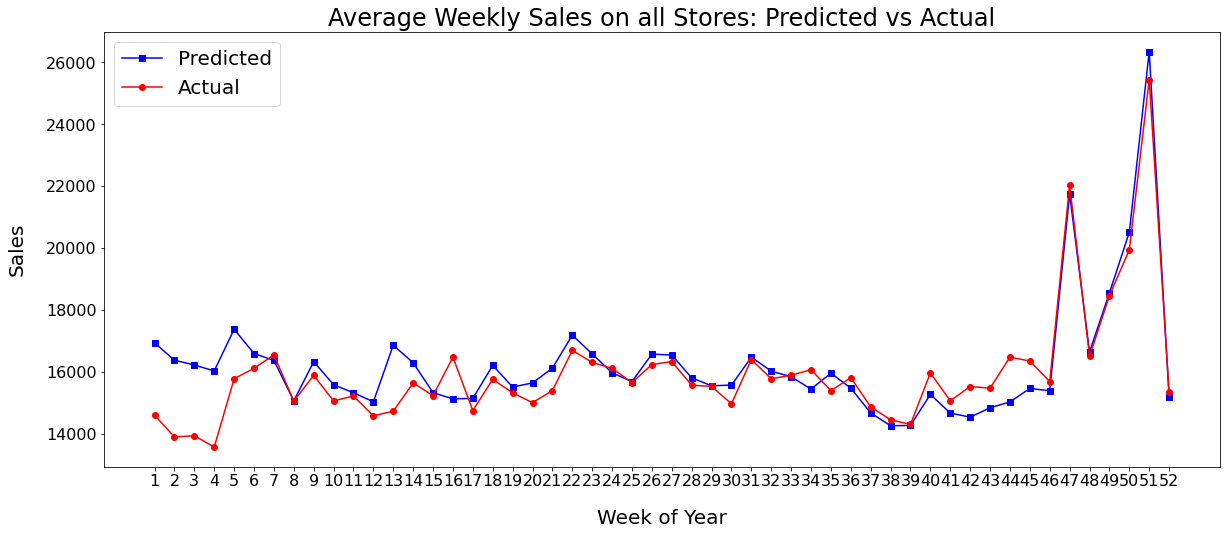

In [29]:
predicted=comparison_cat.groupby('Weekofyear')['Predicted'].mean()
actual=comparison_cat.groupby('Weekofyear')['Actual'].mean()
plt.figure(figsize=(20,8))
plt.plot(predicted.index, predicted.values, 's-b')
plt.plot(actual.index, actual.values, 'o-r')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales on all Stores: Predicted vs Actual", fontsize=24)
plt.legend(['Predicted', 'Actual'], fontsize=20)

 ## <a class="anchor" id="catb">6. BEST MODEL PREDICTION</a>

In [ ]:
for i in comparison_rf2.Store.unique():
    for j in comparison_rf2[comparison_rf2['Store']==i]['Dept'].unique():
        p=comparison_cat[(comparison_rf2['Store']==i) & (comparison_rf2['Dept']==j)]#['Predicted']
        plt.figure(figsize=(20,8))
        plt.plot(p.Weekofyear.values, p.Predicted.values, 's-b')
        plt.plot(p.Weekofyear.values, p.Actual.values, 'o-r')
        
        plt.xticks(np.arange(1, 53, step=1), fontsize=16)
        plt.yticks( fontsize=16)
        plt.xlabel('Week of Year', fontsize=20, labelpad=20)
        plt.ylabel('Sales', fontsize=20, labelpad=20)
        plt.title(f"Average Weekly Sales on Store {i} Dept {j}: Predicted vs Actual", fontsize=24)

plt.legend(['Predicted', 'Actual'], fontsize=20)